### Import libraries

In [9]:
from dotenv import load_dotenv
import google.generativeai as genai
import os

In [68]:
load_dotenv()
api_key = os.getenv("API_KEY")
genai.configure(api_key=api_key)

for i, m in zip(range(5), genai.list_tuned_models()):
  print(m.name)

tunedModels/pylint-corrector-model
tunedModels/pylint-corrector-model-2


## Create tuned model

To create a tuned model, you need to pass your dataset to the model in the `genai.create_tuned_model` method. You can do this be directly defining the input and output values in the call or importing from a file into a dataframe to pass to the method.

For this example, you will tune a model to generate the next number in the sequence. For example, if the input is `1`, the model should output `2`. If the input is `one hundred`, the output should be `one hundred one`.

In [67]:
base_model = [
    m for m in genai.list_models()
    if "createTunedModel" in m.supported_generation_methods and
    "flash" in m.name][0]
base_model

Model(name='models/gemini-1.5-flash-001-tuning',
      base_model_id='',
      version='001',
      display_name='Gemini 1.5 Flash 001 Tuning',
      description='Fast and versatile multimodal model for scaling across diverse tasks',
      input_token_limit=16384,
      output_token_limit=8192,
      supported_generation_methods=['generateContent', 'countTokens', 'createTunedModel'],
      temperature=1.0,
      max_temperature=2.0,
      top_p=0.95,
      top_k=64)

In [83]:
name = 'pylint-corrector-model-3'
operation = genai.create_tuned_model(
    source_model=base_model.name,
    training_data= [
    {
        "text_input": "Error: abstract-class-instantiated\nProblematic Code:\nimport abc\n\n\nclass Animal(abc.ABC):\n@abc.abstractmethod\ndef make_sound(self):\npass\n\n\nsheep = Animal()  # [abstract-class-instantiated]",
        "output": "Corrected Code:\nimport abc\n\n\nclass Animal(abc.ABC):\n@abc.abstractmethod\ndef make_sound(self):\npass\n\n\nclass Sheep(Animal):\ndef make_sound(self):\nprint(\"bhaaaaa\")\n\n\nsheep = Sheep()"
    },
    {
        "text_input": "Error: access-member-before-definition\nProblematic Code:\nclass Unicorn:\ndef __init__(self, fluffiness_level):\nif self.fluffiness_level > 9000:  # [access-member-before-definition]\nprint(\"It's OVER-FLUFFYYYY ! *crush glasses*\")\nself.fluffiness_level = fluffiness_level",
        "output": "Corrected Code:\nclass Unicorn:\ndef __init__(self, fluffiness_level):\nself.fluffiness_level = fluffiness_level\nif self.fluffiness_level > 9000:\nprint(\"It's OVER-FLUFFYYYY ! *crush glasses*\")"
    },
    {
        "text_input": "Error: assigning-non-slot\nProblematic Code:\nclass Student:\n__slots__ = (\"name\",)\n\ndef __init__(self, name, surname):\nself.name = name\nself.surname = surname  # [assigning-non-slot]\nself.setup()\n\ndef setup(self):\npass",
        "output": "Corrected Code:\nclass Student:\n__slots__ = (\"name\", \"surname\")\n\ndef __init__(self, name, surname):\nself.name = name\nself.surname = surname\nself.setup()\n\ndef setup(self):\npass"
    },
    {
        "text_input": "Error: assignment-from-no-return\nProblematic Code:\ndef add(x, y):\nprint(x + y)\n\n\nvalue = add(10, 10)  # [assignment-from-no-return]",
        "output": "Corrected Code:\ndef add(x, y):\nreturn x + y\n\n\nvalue = add(10, 10)"
    },
    {
        "text_input": "Error: assignment-from-none\nProblematic Code:\ndef function():\nreturn None\n\n\nf = function()  # [assignment-from-none]",
        "output": "Corrected Code:\ndef function():\nreturn None\n\n\nf = function() if function() else 1"
    },
    {
        "text_input": "Error: await-outside-async\nProblematic Code:\nimport asyncio\n\n\ndef main():\nawait asyncio.sleep(1)  # [await-outside-async]",
        "output": "Corrected Code:\nimport asyncio\n\n\nasync def main():\nawait asyncio.sleep(1)"
    },  
    {
        "text_input": "Error: bad-except-order\nProblematic Code:\ntry:\nprint(int(input()))\nexcept Exception:\nraise\nexcept TypeError:  # [bad-except-order]\n# This block cannot be reached since TypeError exception\n# is caught by previous exception handler.\nraise",
        "output": "Corrected Code:\ntry:\nprint(int(input()))\nexcept TypeError:\nraise\nexcept Exception:\nraise"
    },
    {
        "text_input": "Error: bad-exception-cause\nProblematic Code:\ndef divide(x, y):\nresult = 0\ntry:\nresult = x / y\nexcept ZeroDivisionError:\n# +1: [bad-exception-cause]\nraise ValueError(f\"Division by zero when dividing {x} by {y} !\") from result\nreturn result",
        "output": "Corrected Code:\ndef divide(x, y):\nresult = 0\ntry:\nresult = x / y\nexcept ZeroDivisionError as exc:\nraise ValueError(f\"Division by zero when dividing {x} by {y} !\") from exc\nreturn result"
    },
    {
        "text_input": "Error: bad-format-character\nProblematic Code:\nprint(\"%s %z\" % (\"hello\", \"world\"))  # [bad-format-character]",
        "output": "Corrected Code:\nprint(\"%s %s\" % (\"hello\", \"world\"))"
    },
    {
        "text_input": "Error: bad-plugin-value\nProblematic Code:\n[MAIN]\nload-plugins = pylint.extensions.bad_biultin",
        "output": "Corrected Code:\n[MAIN]\nload-plugins = pylint.extensions.bad_builtin"
    },
    {
        "text_input": "Error: bad-reversed-sequence\nProblematic Code:\nreversed({1, 2, 3, 4})  # [bad-reversed-sequence]",
        "output": "Corrected Code:\nreversed([1, 2, 3, 4])"
    },
    {
        "text_input": "Error: bad-str-strip-call\nProblematic Code:\n\"Hello World\".strip(\"Hello\")  # [bad-str-strip-call]\n# >>> ' World'",
        "output": "Corrected Code:\n\"abcbc def bacabc\".strip(\"abcbc \")  # [bad-str-strip-call]\n# >>> 'def'"
    },
    {
        "text_input": "Error: bad-string-format-type\nProblematic Code:\nprint(\"%d\" % \"1\")  # [bad-string-format-type]",
        "output": "Corrected Code:\nprint(\"%d\" % 1)"
    },
    {
        "text_input": "Error: bad-super-call\nProblematic Code:\nclass Animal:\npass\n\n\nclass Tree:\npass\n\n\nclass Cat(Animal):\ndef __init__(self):\nsuper(Tree, self).__init__()  # [bad-super-call]\nsuper(Animal, self).__init__()",
        "output": "Corrected Code:\nclass Animal:\npass\n\n\nclass Tree:\npass\n\n\nclass Cat(Animal):\ndef __init__(self):\nsuper(Animal, self).__init__()"
    },
    {
        "text_input": "Error: bidirectional-unicode\nProblematic Code:\n# +1: [bidirectional-unicode]\nexample = \"x'\\u200f'\" * 100  #    \"'\\u200f'x\" is assigned",
        "output": "Corrected Code:\nexample = \"x[U+2194]\" * 100"
    },
    {
        "text_input": "Error: broken-collections-callable\nProblematic Code:\nfrom collections.abc import Callable\nfrom typing import Optional\n\n\ndef func() -> Optional[Callable[[int], None]]:  # [broken-collections-callable]\n...",
        "output": "Corrected Code:\nfrom typing import Callable, Optional\n\n\ndef func() -> Optional[Callable[[int], None]]: ..."
    },
    {
        "text_input": "Error: broken-noreturn\nProblematic Code:\nfrom typing import NoReturn, Union\n\n\ndef exploding_apple(apple) -> Union[None, NoReturn]:  # [broken-noreturn]\nprint(f\"{apple} is about to explode\")",
        "output": "Corrected Code:\nfrom typing import NoReturn\n\n\ndef exploding_apple(apple) -> NoReturn:\nprint(f\"{apple} is about to explode\")\nraise Exception(\"{apple} exploded !\")"
    },
    {
        "text_input": "Error: catching-non-exception\nProblematic Code:\nclass FooError:\npass\n\n\ntry:\n1 / 0\nexcept FooError:  # [catching-non-exception]\npass",
        "output": "Corrected Code:\nclass FooError(Exception):\npass\n\n\ntry:\n1 / 0\nexcept FooError:\npass"
    },
    {
        "text_input": "Error: class-variable-slots-conflict\nProblematic Code:\nclass Person:\n# +1: [class-variable-slots-conflict, class-variable-slots-conflict, class-variable-slots-conflict]\n__slots__ = (\"age\", \"name\", \"say_hi\")\nname = None\n\ndef __init__(self, age, name):\nself.age = age\nself.name = name\n\n@property\ndef age(self):\nreturn self.age\n\ndef say_hi(self):\nprint(f\"Hi, I'm {self.name}.\")",
        "output": "Corrected Code:\nclass Person:\n__slots__ = (\"_age\", \"name\")\n\ndef __init__(self, age, name):\nself._age = age\nself.name = name\n\n@property\ndef age(self):\nreturn self._age\n\ndef say_hi(self):\nprint(f\"Hi, I'm {self.name}.\")"
    },
    {
        "text_input": "Error: continue-in-finally\nProblematic Code:\nwhile True:\ntry:\npass\nfinally:\ncontinue  # [continue-in-finally]",
        "output": "Corrected Code:\nwhile True:\ntry:\npass\nexcept ValueError:\npass\nelse:\ncontinue"
    },
    {
        "text_input": "Error: declare-non-slot\nProblematic Code:\nclass Student:\n__slots__ = (\"name\",)\n\nname: str\nsurname: str  # [declare-non-slot]",
        "output": "Corrected Code:\nclass Student:\n__slots__ = (\"name\", \"surname\")\n\nname: str\nsurname: str"
    },
    {
        "text_input": "Error: dict-iter-missing-items\nProblematic Code:\ndata = {\"Paris\": 2_165_423, \"New York City\": 8_804_190, \"Tokyo\": 13_988_129}\nfor city, population in data:  # [dict-iter-missing-items]\nprint(f\"{city} has population {population}.\")",
        "output": "Corrected Code:\ndata = {\"Paris\": 2_165_423, \"New York City\": 8_804_190, \"Tokyo\": 13_988_129}\nfor city, population in data.items():\nprint(f\"{city} has population {population}.\")"
    },
    {
        "text_input": "Error: duplicate-argument-name\nProblematic Code:\ndef get_fruits(apple, banana, apple):  # [duplicate-argument-name]\npass",
        "output": "Corrected Code:\ndef get_fruits(apple, banana, orange):\npass"
    },
    {
        "text_input": "Error: duplicate-bases\nProblematic Code:\nclass Animal:\npass\n\n\nclass Cat(Animal, Animal):  # [duplicate-bases]\npass",
        "output": "Corrected Code:\nclass Animal:\npass\n\n\nclass Bird(Animal):\npass\n\n\nclass Cat(Animal):\npass"
    },
    {
        "text_input": "Error: format-needs-mapping\nProblematic Code:\nprint(\"%(x)d %(y)d\" % [1, 2])  # [format-needs-mapping]",
        "output": "Corrected Code:\nprint(\"%(x)d %(y)d\" % {\"x\": 1, \"y\": 2})"
    },
    {
        "text_input": "Error: function-redefined\nProblematic Code:\ndef get_email():\npass\n\n\ndef get_email():  # [function-redefined]\npass",
        "output": "Corrected Code:\ndef get_email():\npass"
    },
    {
        "text_input": "Error: import-error\nProblematic Code:\nfrom patlib import Path  # [import-error]",
        "output": "Corrected Code:\nfrom pathlib import Path"
    },
    {
        "text_input": "Error: inconsistent-mro\nProblematic Code:\nclass A:\npass\n\n\nclass B(A):\npass\n\n\nclass C(A, B):  # [inconsistent-mro]\npass",
        "output": "Corrected Code:\nclass A:\npass\n\n\nclass B(A):\npass\n\n\nclass C(B):  # or 'B, A' or 'A' but not 'A, B'\npass"
    },
    {
        "text_input": "Error: inherit-non-class\nProblematic Code:\nclass Fruit(bool):  # [inherit-non-class]\npass",
        "output": "Corrected Code:\nclass Fruit:\ndef __bool__(self):\npass"
    },
    {
        "text_input": "Error: init-is-generator\nProblematic Code:\nclass Fruit:\ndef __init__(self, worms):  # [init-is-generator]\nyield from worms\n\n\napple = Fruit([\"Fahad\", \"Anisha\", \"Tabatha\"])",
        "output": "Corrected Code:\nclass Fruit:\ndef __init__(self, worms):\nself.__worms = worms\n\ndef worms(self):\nyield from self.__worms\n\n\napple = Fruit([\"Fahad\", \"Anisha\", \"Tabatha\"])\nfor worm in apple.worms():\npass"
    },
    {
        "text_input": "Error: invalid-all-format\nProblematic Code:\n__all__ = \"CONST\"  # [invalid-all-format]\n\nCONST = 42",
        "output": "Corrected Code:\n__all__ = (\"CONST\",)\n\nCONST = 42"
    },
    {
        "text_input": "Error: invalid-all-object\nProblematic Code:\n__all__ = (\nNone,  # [invalid-all-object]\nFruit,\nWorm,\n)\n\n\nclass Fruit:\npass\n\n\nclass Worm:\npass",
        "output": "Corrected Code:\n__all__ = [\"Fruit\", \"Worm\"]\n\n\nclass Fruit:\npass\n\n\nclass Worm:\npass"
    },
    {
        "text_input": "Error: invalid-bool-returned\nProblematic Code:\nclass CustomBool:\n\"\"\"__bool__ returns an int\"\"\"\n\ndef __bool__(self):  # [invalid-bool-returned]\nreturn 1",
        "output": "Corrected Code:\nclass CustomBool:\n\"\"\"__bool__ returns `bool`\"\"\"\n\ndef __bool__(self):\nreturn True"
    },
    {
        "text_input": "Error: invalid-bytes-returned\nProblematic Code:\nclass CustomBytes:\n\"\"\"__bytes__ returns <type 'str'>\"\"\"\n\ndef __bytes__(self):  # [invalid-bytes-returned]\nreturn \"123\"",
        "output": "Corrected Code:\nclass CustomBytes:\n\"\"\"__bytes__ returns <type 'bytes'>\"\"\"\n\ndef __bytes__(self):\nreturn b\"some bytes\""
    },
    {
        "text_input": "Error: invalid-character-backspace\nProblematic Code:\nSTRING = \"Invalid character backspace \b\"  # [invalid-character-backspace]",
        "output": "Corrected Code:\nSTRING = \"Valid character backspace \\b\""
    },
    {
        "text_input": "Error: invalid-character-esc\nProblematic Code:\nSTRING = \"Invalid escape character \u001b\"  # [invalid-character-esc]",
        "output": "Corrected Code:\nSTRING = \"Valid escape character \\x1B\""
    },
    {
        "text_input": "Error: invalid-character-sub\nProblematic Code:\nSTRING = \"Invalid character sub \u001a\"  # [invalid-character-sub]",
        "output": "Corrected Code:\nSTRING = \"Valid character sub x1A\""
    },
    {
        "text_input": "Error: invalid-character-zero-width-space\nProblematic Code:\nSTRING = \"Invalid character zero-width-space '\\u200b'\"  # [invalid-character-zero-width-space]",
        "output": "Corrected Code:\nSTRING = \"Valid character zero-width-space u200B\""
    },
    {
        "text_input": "Error: invalid-class-object\nProblematic Code:\nclass Apple:\npass\n\n\nApple.__class__ = 1  # [invalid-class-object]",
        "output": "Corrected Code:\nclass Apple:\npass\n\n\nclass RedDelicious:\npass\n\n\nApple.__class__ = RedDelicious"
    },
    {
        "text_input": "Error: invalid-enum-extension\nProblematic Code:\nfrom enum import Enum\n\n\nclass Color(Enum):\nORANGE = 1\nCHERRY = 2\n\n\nclass Fruit(Color):  # [invalid-enum-extension]\nAPPLE = 3",
        "output": "Corrected Code:\nfrom enum import Enum\n\n\nclass Color(Enum):\nORANGE = 1\nCHERRY = 2\n\n\nclass Fruit(Enum):\nORANGE = 1\nCHERRY = 2\nAPPLE = 3"
    },
    {
        "text_input": "Error: invalid-envvar-value\nProblematic Code:\nimport os\n\nos.getenv(1)  # [invalid-envvar-value]",
        "output": "Corrected Code:\nimport os\n\nos.getenv(\"1\")"
    },
    {
        "text_input": "Error: invalid-field-call\nProblematic Code:\nfrom dataclasses import dataclass, field\n\n\n@dataclass\nclass C:\na: float\nb: float\nc: float\n\nfield(init=False)  # [invalid-field-call]\n\ndef __post_init__(self):\nself.c = self.a + self.b\n\n\nprint(field(init=False))  # [invalid-field-call]",
        "output": "Corrected Code:\nfrom dataclasses import dataclass, field, make_dataclass\n\nC = make_dataclass(\n\"C\",\n[(\"x\", int), \"y\", (\"z\", int, field(default=5))],\nnamespace={\"add_one\": lambda self: self.x + 1},\n)\n\n\n@dataclass\nclass C:\na: float\nb: float\nc: float = field(init=False)\n\ndef __post_init__(self):\nself.c = self.a + self.b"
    },
    {
        "text_input": "Error: invalid-format-returned\nProblematic Code:\nclass CustomFormat:\n\"\"\"__format__ returns <type 'int'>\"\"\"\n\ndef __format__(self, format_spec):  # [invalid-format-returned]\nreturn 1",
        "output": "Corrected Code:\nclass CustomFormat:\n\"\"\"__format__ returns <type 'str'>\"\"\"\n\ndef __format__(self, format_spec):\nreturn \"hello!\""
    },
    {
        "text_input": "Error: invalid-getnewargs-ex-returned\nProblematic Code:\nclass CustomGetNewArgsEx:\n\"\"\"__getnewargs_ex__ returns tuple with incorrect arg length\"\"\"\n\ndef __getnewargs_ex__(self):  # [invalid-getnewargs-ex-returned]\nreturn (tuple(1), dict(x=\"y\"), 1)",
        "output": "Corrected Code:\nclass CustomGetNewArgsEx:\n\"\"\"__getnewargs_ex__ returns <type 'tuple'>\"\"\"\n\ndef __getnewargs_ex__(self):\nreturn ((1,), {\"2\": 2})"
    },
    {
        "text_input": "Error: invalid-getnewargs-returned\nProblematic Code:\nclass CustomGetNewArgs:\n\"\"\"__getnewargs__ returns an integer\"\"\"\n\ndef __getnewargs__(self):  # [invalid-getnewargs-returned]\nreturn 1",
        "output": "Corrected Code:\nclass CustomGetNewArgs:\n\"\"\"__getnewargs__ returns <type 'tuple'>\"\"\"\n\ndef __getnewargs__(self):\nreturn (1, 2)"
    },
    {
        "text_input": "Error: invalid-hash-returned\nProblematic Code:\nclass CustomHash:\n\"\"\"__hash__ returns dict\"\"\"\n\ndef __hash__(self):  # [invalid-hash-returned]\nreturn {}",
        "output": "Corrected Code:\nclass CustomHash:\n\"\"\"__hash__ returns `int`\"\"\"\n\ndef __hash__(self):\nreturn 19"
    },
    {
        "text_input": "Error: invalid-index-returned\nProblematic Code:\nclass CustomIndex:\n\"\"\"__index__ returns a dict\"\"\"\n\ndef __index__(self):  # [invalid-index-returned]\nreturn {\"19\": \"19\"}",
        "output": "Corrected Code:\nclass CustomIndex:\n\"\"\"__index__ returns <type 'int'>\"\"\"\n\ndef __index__(self):\nreturn 19"
    },
    {
        "text_input": "Error: invalid-length-hint-returned\nProblematic Code:\nclass CustomLengthHint:\n\"\"\"__length_hint__ returns non-int\"\"\"\n\ndef __length_hint__(self):  # [invalid-length-hint-returned]\nreturn 3.0",
        "output": "Corrected Code:\nclass CustomLengthHint:\n\"\"\"__length_hint__ returns <type 'int'>\"\"\"\n\ndef __length_hint__(self):\nreturn 10"
    },
    {
        "text_input": "Error: invalid-length-returned\nProblematic Code:\nclass FruitBasket:\ndef __init__(self, fruits):\nself.fruits = [\"Apple\", \"Banana\", \"Orange\"]\n\ndef __len__(self):  # [invalid-length-returned]\nreturn -len(self.fruits)",
        "output": "Corrected Code:\nclass FruitBasket:\ndef __init__(self, fruits):\nself.fruits = [\"Apple\", \"Banana\", \"Orange\"]\n\ndef __len__(self):\nreturn len(self.fruits)"
    },
    {
        "text_input": "Error: invalid-metaclass\nProblematic Code:\nclass Apple(metaclass=int):  # [invalid-metaclass]\npass",
        "output": "Corrected Code:\nclass Plant:\npass\n\n\nclass Apple(Plant):\npass"
    },
    {
        "text_input": "Error: invalid-repr-returned\nProblematic Code:\nclass CustomRepr:\n\"\"\"__repr__ returns <type 'int'>\"\"\"\n\ndef __repr__(self):  # [invalid-repr-returned]\nreturn 1",
        "output": "Corrected Code:\nclass CustomRepr:\n\"\"\"__repr__ returns <type 'str'>\"\"\"\n\ndef __repr__(self):\nreturn \"apples\""
    },
    {
        "text_input": "Error: invalid-sequence-index\nProblematic Code:\nfruits = [\"apple\", \"banana\", \"orange\"]\nprint(fruits[\"apple\"])  # [invalid-sequence-index]",
        "output": "Corrected Code:\nfruits = [\"apple\", \"banana\", \"orange\"]\nprint(fruits[0])"
    },
    {
        "text_input": "Error: invalid-slice-index\nProblematic Code:\nLETTERS = [\"a\", \"b\", \"c\", \"d\"]\n\nFIRST_THREE = LETTERS[:\"3\"]  # [invalid-slice-index]",
        "output": "Corrected Code:\nLETTERS = [\"a\", \"b\", \"c\", \"d\"]\n\nFIRST_THREE = LETTERS[:3]"
    },
    {
        "text_input": "Error: invalid-slice-step\nProblematic Code:\nLETTERS = [\"a\", \"b\", \"c\", \"d\"]\n\nLETTERS[::0]  # [invalid-slice-step]",
        "output": "Corrected Code:\nLETTERS = [\"a\", \"b\", \"c\", \"d\"]\n\nLETTERS[::2]"
    },
    {
        "text_input": "Error: invalid-slots\nProblematic Code:\nclass Person:  # [invalid-slots]\n__slots__ = 42",
        "output": "Corrected Code:\nclass Person:\n__slots__ = (\"name\", \"age\")"
    },
    {
        "text_input": "Error: invalid-slots-object\nProblematic Code:\nclass Person:\n__slots__ = (\"name\", 3)  # [invalid-slots-object]",
        "output": "Corrected Code:\nclass Person:\n__slots__ = (\"name\", \"surname\")"
    },
    {
        "text_input": "Error: invalid-star-assignment-target\nProblematic Code:\n*fruit = [\"apple\", \"banana\", \"orange\"]  # [invalid-star-assignment-target]",
        "output": "Corrected Code:\nfruit = [\"apple\", \"banana\", \"orange\"]"
    },
    {
        "text_input": "Error: invalid-str-returned\nProblematic Code:\nclass CustomStr:\n\"\"\"__str__ returns int\"\"\"\n\ndef __str__(self):  # [invalid-str-returned]\nreturn 1",
        "output": "Corrected Code:\nclass CustomStr:\n\"\"\"__str__ returns <type 'str'>\"\"\"\n\ndef __str__(self):\nreturn \"oranges\""
    },
    {
        "text_input": "Error: invalid-unary-operand-type\nProblematic Code:\ncherries = 10\neaten_cherries = int\ncherries = -eaten_cherries  # [invalid-unary-operand-type]",
        "output": "Corrected Code:\ncherries = 10\neaten_cherries = 2\ncherries -= eaten_cherries"
    },
    {
        "text_input": "Error: logging-format-truncated\nProblematic Code:\nimport logging\nimport sys\n\nlogging.warning(\"Python version: %\", sys.version)  # [logging-format-truncated]",
        "output": "Corrected Code:\nimport logging\nimport sys\n\nlogging.warning(\"Python version: %s\", sys.version)"
    },
    {
        "text_input": "Error: logging-too-few-args\nProblematic Code:\nimport logging\n\ntry:\nfunction()\nexcept Exception as e:\nlogging.error(\"%s error occurred: %s\", e)  # [logging-too-few-args]\nraise",
        "output": "Corrected Code:\nimport logging\n\ntry:\nfunction()\nexcept Exception as e:\nlogging.error(\"%s error occurred: %s\", type(e), e)\nraise"
    },
    {
        "text_input": "Error: logging-too-many-args\nProblematic Code:\nimport logging\n\ntry:\nfunction()\nexcept Exception as e:\nlogging.error(\"Error occurred: %s\", type(e), e)  # [logging-too-many-args]\nraise",
        "output": "Corrected Code:\nimport logging\n\ntry:\nfunction()\nexcept Exception as e:\nlogging.error(\"%s error occurred: %s\", type(e), e)\nraise"
    },
    {
        "text_input": "Error: logging-unsupported-format\nProblematic Code:\nimport logging\n\nlogging.info(\"%s %y !\", \"Hello\", \"World\")  # [logging-unsupported-format]",
        "output": "Corrected Code:\nimport logging\n\nlogging.info(\"%s %s !\", \"Hello\", \"World\")"
    },
    {
        "text_input": "Error: method-hidden\nProblematic Code:\nclass Fruit:\ndef __init__(self, vitamins):\nself.vitamins = vitamins\n\ndef vitamins(self):  # [method-hidden]\npass",
        "output": "Corrected Code:\nclass Fruit:\ndef __init__(self, vitamins):\nself.vitamins = vitamins\n\ndef antioxidants(self):\npass"
    },
    {
        "text_input": "Error: misplaced-bare-raise\nProblematic Code:\ndef validate_positive(x):\nif x <= 0:\nraise  # [misplaced-bare-raise]",
        "output": "Corrected Code:\ndef validate_positive(x):\nif x <= 0:\nraise ValueError(f\"{x} is not positive\")"
    },
    {
        "text_input": "Error: misplaced-format-function\nProblematic Code:\nprint(\"Value: {}\").format(\"Car\")  # [misplaced-format-function]",
        "output": "Corrected Code:\nprint(\"Value: {}\".format(\"Car\"))"
    },
    {
        "text_input": "Error: missing-format-string-key\nProblematic Code:\n# +1: [missing-format-string-key]\nfruit_prices = \"\"\"\nApple: %(apple_price)d '\u00a4'\nOrange: %(orange_price)d '\u00a4'\n\"\"\" % {\n\"apple_price\": 42\n}",
        "output": "Corrected Code:\nfruit_prices = \"\"\"\nApple: %(apple_price)d '\u00a4'\nOrange: %(orange_price)d '\u00a4'\n\"\"\" % {\n\"apple_price\": 42,\n\"orange_price\": 87,\n}"
    },
    {
        "text_input": "Error: missing-kwoa\nProblematic Code:\ndef target(pos, *, keyword):\nreturn pos + keyword\n\n\ndef not_forwarding_kwargs(*args, **kwargs):\ntarget(*args)  # [missing-kwoa]",
        "output": "Corrected Code:\ndef target(pos, *, keyword):\nreturn pos + keyword\n\n\ndef not_forwarding_kwargs(*args, **kwargs):\ntarget(*args, **kwargs)"
    },
    {
        "text_input": "Error: mixed-format-string\nProblematic Code:\nprint(\"x=%(x)d, y=%d\" % (0, 1))  # [mixed-format-string]",
        "output": "Corrected Code:\nprint(\"x=%(x)d, y=%(y)d\" % {\"x\": 0, \"y\": 1})"
    },
    {
        "text_input": "Error: modified-iterating-dict\nProblematic Code:\nfruits = {\"apple\": 1, \"orange\": 2, \"mango\": 3}\n\ni = 0\nfor fruit in fruits:\nfruits[\"apple\"] = i  # [modified-iterating-dict]\ni += 1",
        "output": "Corrected Code:\nfruits = {\"apple\": 1, \"orange\": 2, \"mango\": 3}\n\ni = 0\nfor fruit in fruits.copy():\nfruits[\"apple\"] = i\ni += 1"
    },
    {
        "text_input": "Error: modified-iterating-set\nProblematic Code:\nfruits = {\"apple\", \"orange\", \"mango\"}\nfor fruit in fruits:\nfruits.add(fruit + \"yum\")  # [modified-iterating-set]",
        "output": "Corrected Code:\nfruits = {\"apple\", \"orange\", \"mango\"}\nfor fruit in fruits.copy():\nfruits.add(fruit + \"yum\")"
    },
    {
        "text_input": "Error: no-member\nProblematic Code:\nfrom pathlib import Path\n\ndirectories = Path(\".\").mothers  # [no-member]\n\n\nclass Cat:\ndef meow(self):\nprint(\"Meow\")\n\n\nCat().roar()  # [no-member]",
        "output": "Corrected Code:\nfrom pathlib import Path\n\ndirectories = Path(\".\").parents\n\n\nclass Cat:\ndef meow(self):\nprint(\"Meow\")\n\n\nCat().meow()"
    },
    {
        "text_input": "Error: no-method-argument\nProblematic Code:\nclass Person:\ndef print_greeting():  # [no-method-argument]\nprint(\"hello\")",
        "output": "Corrected Code:\nclass Person:\ndef print_greeting(self):\nprint(\"hello\")"
    },
    {
        "text_input": "Error: no-name-in-module\nProblematic Code:\nfrom os import pizza  # [no-name-in-module]",
        "output": "Corrected Code:\nfrom os import path"
    },
    {
        "text_input": "Error: no-self-argument\nProblematic Code:\nclass Fruit:\ndef __init__(this, name):  # [no-self-argument]\nthis.name = name",
        "output": "Corrected Code:\nclass Fruit:\ndef __init__(self, name):\nself.name = name"
    },
    {
        "text_input": "Error: no-value-for-parameter\nProblematic Code:\ndef add(x, y):\nreturn x + y\n\n\nadd(1)  # [no-value-for-parameter]",
        "output": "Corrected Code:\ndef add(x, y):\nreturn x + y\n\n\nadd(1, 2)"
    },
    {
        "text_input": "Error: non-iterator-returned\nProblematic Code:\nimport random\n\n\nclass GenericAstrology:\ndef __init__(self, signs, predictions):\nself.signs = signs\nself.predictions = predictions\n\ndef __iter__(self):  # [non-iterator-returned]\nself.index = 0\nself.number_of_prediction = len(self.predictions)\nreturn self\n\n\nSIGNS = [\"Aries\", \"Taurus\", \"Gemini\", \"Cancer\", \"Leo\", \"Virgo\", \"Libra\"]\nPREDICTIONS = [\"good things\", \"bad thing\", \"existential dread\"]\nfor sign, prediction in GenericAstrology(SIGNS, PREDICTIONS):\nprint(f\"{sign} : {prediction} today\")",
        "output": "Corrected Code:\nimport random\n\n\nclass GenericAstrology:\ndef __init__(self, signs, predictions):\nself.signs = signs\nself.predictions = predictions\n\ndef __iter__(self):\nself.index = 0\nself.number_of_prediction = len(self.predictions)\nreturn self\n\ndef __next__(self):\nif self.index == len(self.signs):\nraise StopIteration\nself.index += 1\nprediction_index = random.randint(0, self.number_of_prediction - 1)\nreturn self.signs[self.index - 1], self.predictions[prediction_index]\n\n\nSIGNS = [\"Aries\", \"Taurus\", \"Gemini\", \"Cancer\", \"Leo\", \"Virgo\", \"Libra\"]\nPREDICTIONS = [\"good things\", \"bad thing\", \"existential dread\"]\nfor sign, prediction in GenericAstrology(SIGNS, PREDICTIONS):\nprint(f\"{sign} : {prediction} today\")"
    },
    {
        "text_input": "Error: nonexistent-operator\nProblematic Code:\ni = 0\n\nwhile i <= 10:\nprint(i)\n++i  # [nonexistent-operator]",
        "output": "Corrected Code:\ni = 0\n\nwhile i <= 10:\nprint(i)\ni += 1"
    },
    {
        "text_input": "Error: nonlocal-and-global\nProblematic Code:\nNUMBER = 42\n\n\ndef update_number(number):  # [nonlocal-and-global]\nglobal NUMBER\nnonlocal NUMBER\nNUMBER = number\nprint(f\"New global number is: {NUMBER}\")\n\n\nupdate_number(24)",
        "output": "Corrected Code:\nNUMBER = 42\n\n\ndef update_number(number):\nglobal NUMBER\nNUMBER = number\nprint(f\"New global number is: {NUMBER}\")\n\n\nupdate_number(24)"
    },
    {
        "text_input": "Error: nonlocal-without-binding\nProblematic Code:\nclass Fruit:\ndef get_color(self):\nnonlocal colors  # [nonlocal-without-binding]",
        "output": "Corrected Code:\nclass Fruit:\ncolors = [\"red\", \"green\"]\n\ndef get_color(self):\nnonlocal colors"
    },
    {
        "text_input": "Error: not-a-mapping\nProblematic Code:\ndef print_colors(**colors):\nprint(colors)\n\n\nprint_colors(**list(\"red\", \"black\"))  # [not-a-mapping]",
        "output": "Corrected Code:\ndef print_colors(**colors):\nprint(colors)\n\n\nprint_colors(**dict(red=1, black=2))"
    },
    {
        "text_input": "Error: not-an-iterable\nProblematic Code:\nfor i in 10:  # [not-an-iterable]\npass",
        "output": "Corrected Code:\nfor i in \"10\":\npass"
    },
    {
        "text_input": "Error: not-async-context-manager\nProblematic Code:\nclass ContextManager:\ndef __enter__(self):\npass\n\ndef __exit__(self, *exc):\npass\n\n\nasync def foo():\nasync with ContextManager():  # [not-async-context-manager]\npass",
        "output": "Corrected Code:\nclass AsyncContextManager:\ndef __aenter__(self):\npass\n\ndef __aexit__(self, *exc):\npass\n\n\nasync def foo():\nasync with AsyncContextManager():\npass"
    },
    {
        "text_input": "Error: not-callable\nProblematic Code:\nNUMBER = 42\nprint(NUMBER())  # [not-callable]",
        "output": "Corrected Code:\nNUMBER = 42\nprint(NUMBER)"
    },
    {
        "text_input": "Error: not-context-manager\nProblematic Code:\nclass MyContextManager:\ndef __enter__(self):\npass\n\n\nwith MyContextManager() as c:  # [not-context-manager]\npass",
        "output": "Corrected Code:\nclass MyContextManager:\ndef __enter__(self):\npass\n\ndef __exit__(self, *exc):\npass\n\n\nwith MyContextManager() as c:\npass"
    },
    {
        "text_input": "Error: not-in-loop\nProblematic Code:\ndef print_even_numbers():\nfor i in range(100):\nif i % 2 == 0:\nprint(i)\nelse:\ncontinue  # [not-in-loop]",
        "output": "Corrected Code:\ndef print_even_numbers():\nfor i in range(100):\nif i % 2:\ncontinue\nprint(i)"
    },
    {
        "text_input": "Error: notimplemented-raised\nProblematic Code:\nclass Worm:\ndef bore(self):\nraise NotImplemented  # [notimplemented-raised]",
        "output": "Corrected Code:\nclass Worm:\ndef bore(self):\nraise NotImplementedError"
    },
    {
        "text_input": "Error: positional-only-arguments-expected\nProblematic Code:\ndef cube(n, /):\n\"\"\"Takes in a number n, returns the cube of n\"\"\"\nreturn n**3\n\n\ncube(n=2)  # [positional-only-arguments-expected]",
        "output": "Corrected Code:\ndef cube(n, /):\n\"\"\"Takes in a number n, returns the cube of n\"\"\"\nreturn n**3\n\n\ncube(2)"
    },
    {
        "text_input": "Error: possibly-used-before-assignment\nProblematic Code:\ndef check_lunchbox(items: list[str]):\nif not items:\nempty = True\nprint(empty)  # [possibly-used-before-assignment]",
        "output": "Corrected Code:\ndef check_lunchbox(items: list[str]):\nempty = False\nif not items:\nempty = True\nprint(empty)"
    },
    {
        "text_input": "Error: potential-index-error\nProblematic Code:\nprint([1, 2, 3][3])  # [potential-index-error]",
        "output": "Corrected Code:\nprint([1, 2, 3][2])"
    },
    {
        "text_input": "Error: raising-bad-type\nProblematic Code:\nclass FasterThanTheSpeedOfLightError(ZeroDivisionError):\ndef __init__(self):\nsuper().__init__(\"You can't go faster than the speed of light !\")\n\n\ndef calculate_speed(distance: float, time: float) -> float:\ntry:\nreturn distance / time\nexcept ZeroDivisionError as e:\nraise None  # [raising-bad-type]",
        "output": "Corrected Code:\nclass FasterThanTheSpeedOfLightError(ZeroDivisionError):\ndef __init__(self):\nsuper().__init__(\"You can't go faster than the speed of light !\")\n\n\ndef calculate_speed(distance: float, time: float) -> float:\ntry:\nreturn distance / time\nexcept ZeroDivisionError as e:\nraise FasterThanTheSpeedOfLightError() from e"
    },
    {
        "text_input": "Error: raising-non-exception\nProblematic Code:\nraise str  # [raising-non-exception]",
        "output": "Corrected Code:\nraise Exception(\"Goodbye world !\")"
    },
    {
        "text_input": "Error: redundant-keyword-arg\nProblematic Code:\ndef square(x):\nreturn x * x\n\n\nsquare(5, x=4)  # [redundant-keyword-arg]",
        "output": "Corrected Code:\ndef square(x):\nreturn x * x\n\n\nsquare(5)"
    },
    {
        "text_input": "Error: relative-beyond-top-level\nProblematic Code:\nfrom ................antigravity import NGField  # [relative-beyond-top-level]",
        "output": "Corrected Code:\nfrom physic.antigravity import NGField"
    },
    {
        "text_input": "Error: repeated-keyword\nProblematic Code:\ndef func(a, b, c):\nreturn a, b, c\n\n\nfunc(1, 2, c=3, **{\"c\": 4})  # [repeated-keyword]\nfunc(1, 2, **{\"c\": 3}, **{\"c\": 4})  # [repeated-keyword]",
        "output": "Corrected Code:\ndef func(a, b, c):\nreturn a, b, c\n\n\nfunc(1, 2, c=3)"
    },
    {
        "text_input": "Error: return-arg-in-generator\nProblematic Code:\ndef yield_numbers():\nfor number in range(10):\nyield number\nreturn \"I am now allowed!\"  # This was not allowed in Python 3.3 and earlier.",
        "output": "Corrected Code:\ndef interrogate_until_you_find_jack(pirates):\nfor pirate in pirates:\nif pirate == \"Captain Jack Sparrow\":\nreturn \"Arrr! We've found our captain!\"\nyield pirate"
    },
    {
        "text_input": "Error: return-in-init\nProblematic Code:\nclass Sum:\ndef __init__(self, a, b):  # [return-in-init]\nreturn a + b",
        "output": "Corrected Code:\nclass Sum:\ndef __init__(self, a, b) -> None:\nself.result = a + b"
    },
    {
        "text_input": "Error: return-outside-function\nProblematic Code:\nreturn 42  # [return-outside-function]",
        "output": "Corrected Code:\ndef get_the_answer():\nreturn 42"
    },
    {
        "text_input": "Error: singledispatch-method\nProblematic Code:\nfrom functools import singledispatch\n\n\nclass Board:\n@singledispatch  # [singledispatch-method]\ndef convert_position(self, position):\npass\n\n@convert_position.register  # [singledispatch-method]\ndef _(self, position: str) -> tuple:\nposition_a, position_b = position.split(\",\")\nreturn (int(position_a), int(position_b))\n\n@convert_position.register  # [singledispatch-method]\ndef _(self, position: tuple) -> str:\nreturn f\"{position[0]},{position[1]}\"",
        "output": "Corrected Code:\nfrom functools import singledispatch\n\n\n@singledispatch\ndef convert_position(position):\nprint(position)\n\n\n@convert_position.register\ndef _(position: str) -> tuple:\nposition_a, position_b = position.split(\",\")\nreturn (int(position_a), int(position_b))\n\n\n@convert_position.register\ndef _(position: tuple) -> str:\nreturn f\"{position[0]},{position[1]}\""
    },
    {
        "text_input": "Error: singledispatchmethod-function\nProblematic Code:\nfrom functools import singledispatchmethod\n\n\n@singledispatchmethod  # [singledispatchmethod-function]\ndef convert_position(position):\nprint(position)\n\n\n@convert_position.register  # [singledispatchmethod-function]\ndef _(position: str) -> tuple:\nposition_a, position_b = position.split(\",\")\nreturn (int(position_a), int(position_b))\n\n\n@convert_position.register  # [singledispatchmethod-function]\ndef _(position: tuple) -> str:\nreturn f\"{position[0]},{position[1]}\"",
        "output": "Corrected Code:\nfrom functools import singledispatchmethod\n\n\nclass Board:\n@singledispatchmethod\ndef convert_position(cls, position):\npass\n\n@singledispatchmethod\n@classmethod\ndef _(cls, position: str) -> tuple:\nposition_a, position_b = position.split(\",\")\nreturn (int(position_a), int(position_b))\n\n@singledispatchmethod\n@classmethod\ndef _(cls, position: tuple) -> str:\nreturn f\"{position[0]},{position[1]}\""
    },
    {
        "text_input": "Error: star-needs-assignment-target\nProblematic Code:\nstars = *[\"Sirius\", \"Arcturus\", \"Vega\"]  # [star-needs-assignment-target]",
        "output": "Corrected Code:\nsirius, *arcturus_and_vega = [\"Sirius\", \"Arcturus\", \"Vega\"]"
    },
    {
        "text_input": "Error: syntax-error\nProblematic Code:\nfruit_stock = {\n'apple': 42,\n'orange': 21  # [syntax-error]\n'banana': 12\n}",
        "output": "Corrected Code:\nfruit_stock = {\"apple\": 42, \"orange\": 21, \"banana\": 12}"
    },
    {
        "text_input": "Error: too-few-format-args\nProblematic Code:\nprint(\"Today is {0}, so tomorrow will be {1}\".format(\"Monday\"))  # [too-few-format-args]",
        "output": "Corrected Code:\nprint(\"Today is {0}, so tomorrow will be {1}\".format(\"Monday\", \"Tuesday\"))"
    },
    {
        "text_input": "Error: too-many-format-args\nProblematic Code:\n# +1: [too-many-format-args]\nprint(\"Today is {0}, so tomorrow will be {1}\".format(\"Monday\", \"Tuesday\", \"Wednesday\"))",
        "output": "Corrected Code:\nprint(\"Today is {0}, so tomorrow will be {1}\".format(\"Monday\", \"Tuesday\"))"
    },
    {
        "text_input": "Error: too-many-function-args\nProblematic Code:\nclass Fruit:\ndef __init__(self, color):\nself.color = color\n\n\napple = Fruit(\"red\", \"apple\", [1, 2, 3])  # [too-many-function-args]",
        "output": "Corrected Code:\nclass Fruit:\ndef __init__(self, color, name):\nself.color = color\nself.name = name\n\n\napple = Fruit(\"red\", \"apple\")"
    },
    {
        "text_input": "Error: too-many-star-expressions\nProblematic Code:\n*stars, *constellations = [\"Sirius\", \"Arcturus\", \"Vega\"]  # [too-many-star-expressions]",
        "output": "Corrected Code:\n*sirius_and_arcturus, vega = [\"Sirius\", \"Arcturus\", \"Vega\"]"
    },
    {
        "text_input": "Error: truncated-format-string\nProblematic Code:\nPARG_2 = 1\n\nprint(\"strange format %2\" % PARG_2)  # [truncated-format-string]",
        "output": "Corrected Code:\nPARG_2 = 1\n\nprint(f\"strange format {PARG_2}\")"
    },
    {
        "text_input": "Error: undefined-all-variable\nProblematic Code:\n__all__ = [\"get_fruit_colour\"]  # [undefined-all-variable]\n\n\ndef get_fruit_color():\npass",
        "output": "Corrected Code:\n__all__ = [\"get_fruit_color\"]\n\n\ndef get_fruit_color():\npass"
    },
    {
        "text_input": "Error: undefined-variable\nProblematic Code:\nprint(number + 2)  # [undefined-variable]",
        "output": "Corrected Code:\nnumber = 3\nprint(number + 2)"
    },
    {
        "text_input": "Error: unexpected-keyword-arg\nProblematic Code:\ndef print_coordinates(x=0, y=0):\nprint(f\"{x=}, {y=}\")\n\n\nprint_coordinates(x=1, y=2, z=3)  # [unexpected-keyword-arg]",
        "output": "Corrected Code:\ndef print_coordinates(x=0, y=0):\nprint(f\"{x=}, {y=}\")\n\n\nprint_coordinates(x=1, y=2)"
    },
    {
        "text_input": "Error: unexpected-special-method-signature\nProblematic Code:\nclass ContextManager:\ndef __enter__(self, context):  # [unexpected-special-method-signature]\npass\n\ndef __exit__(self, type):  # [unexpected-special-method-signature]\npass",
        "output": "Corrected Code:\nclass ContextManager:\ndef __enter__(self):\npass\n\ndef __exit__(self, type, value, traceback):\npass"
    },
    {
        "text_input": "Error: unhashable-member\nProblematic Code:\n# Print the number of apples:\nprint({\"apple\": 42}[[\"apple\"]])  # [unhashable-member]",
        "output": "Corrected Code:\n# Print the number of apples:\nprint({\"apple\": 42}[\"apple\"])"
    },
    {
        "text_input": "Error: unpacking-non-sequence\nProblematic Code:\na, b, c = 1  # [unpacking-non-sequence]",
        "output": "Corrected Code:\na, b, c = 1, 2, 3"
    },
    {
        "text_input": "Error: unrecognized-inline-option\nProblematic Code:\n# +1: [unrecognized-inline-option]\n# pylint:applesoranges=1",
        "output": "Corrected Code:\n# pylint: enable=too-many-public-methods"
    },
    {
        "text_input": "Error: unrecognized-option\nProblematic Code:\n[tool.pylint]\njars = \"10\"",
        "output": "Corrected Code:\n[tool.pylint]\njobs = \"10\""
    },
    {
        "text_input": "Error: unsubscriptable-object\nProblematic Code:\nclass Fruit:\npass\n\n\nFruit()[1]  # [unsubscriptable-object]",
        "output": "Corrected Code:\nclass Fruit:\ndef __init__(self):\nself.colors = [\"red\", \"orange\", \"yellow\"]\n\ndef __getitem__(self, idx):\nreturn self.colors[idx]\n\n\nFruit()[1]"
    },
    {
        "text_input": "Error: unsupported-assignment-operation\nProblematic Code:\ndef pick_fruits(fruits):\nfor fruit in fruits:\nprint(fruit)\n\n\npick_fruits([\"apple\"])[0] = \"orange\"  # [unsupported-assignment-operation]",
        "output": "Corrected Code:\ndef pick_fruits(fruits):\nfor fruit in fruits:\nprint(fruit)\n\nreturn []\n\n\npick_fruits([\"apple\"])[0] = \"orange\""
    },
    {
        "text_input": "Error: unsupported-binary-operation\nProblematic Code:\ndrink = \"water\" | None  # [unsupported-binary-operation]\nresult = [] | None  # [unsupported-binary-operation]",
        "output": "Corrected Code:\nmasked = 0b111111 & 0b001100\nresult = 0xAEFF | 0x0B99"
    },
    {
        "text_input": "Error: unsupported-delete-operation\nProblematic Code:\nFRUITS = (\"apple\", \"orange\", \"berry\")\n\ndel FRUITS[0]  # [unsupported-delete-operation]",
        "output": "Corrected Code:\nFRUITS = [\"apple\", \"orange\", \"berry\"]\n\ndel FRUITS[0]"
    },
    {
        "text_input": "Error: unsupported-membership-test\nProblematic Code:\nclass Fruit:\npass\n\n\napple = \"apple\" in Fruit()  # [unsupported-membership-test]",
        "output": "Corrected Code:\nclass Fruit:\nFRUITS = [\"apple\", \"orange\"]\n\ndef __contains__(self, name):\nreturn name in self.FRUITS\n\n\napple = \"apple\" in Fruit()"
    },
    {
        "text_input": "Error: used-before-assignment\nProblematic Code:\nprint(hello)  # [used-before-assignment]\nhello = \"Hello World !\"",
        "output": "Corrected Code:\nhello = \"Hello World !\"\nprint(hello)"
    },
    {
        "text_input": "Error: used-prior-global-declaration\nProblematic Code:\nTOMATO = \"black cherry\"\n\n\ndef update_tomato():\nprint(TOMATO)  # [used-prior-global-declaration]\nglobal TOMATO\nTOMATO = \"cherry tomato\"",
        "output": "Corrected Code:\nTOMATO = \"black cherry\"\n\n\ndef update_tomato():\nglobal TOMATO\nTOMATO = \"moneymaker\""
    },
    {
        "text_input": "Error: yield-inside-async-function\nProblematic Code:\nasync def foo():\nyield from [1, 2, 3]  # [yield-inside-async-function]",
        "output": "Corrected Code:\nasync def foo():\ndef _inner_foo():\nyield from [1, 2, 3]\n\n\nasync def foo():\nyield 42"
    },
    {
        "text_input": "Error: yield-outside-function\nProblematic Code:\nfor i in range(10):\nyield i  # [yield-outside-function]",
        "output": "Corrected Code:\ndef one_to_ten():\nfor i in range(10):\nyield i"
    },
    {
        "text_input": "Error: abstract-method\nProblematic Code:\nimport abc\n\n\nclass WildAnimal:\n@abc.abstractmethod\ndef make_sound(self):\npass\n\n\nclass Panther(WildAnimal):  # [abstract-method]\npass",
        "output": "Corrected Code:\nclass Pet:\ndef make_sound(self):\nraise NotImplementedError\n\n\nclass Cat(Pet):  # [abstract-method]\npass"
    },
    {
        "text_input": "Error: anomalous-backslash-in-string\nProblematic Code:\nstring = \"\\z\"  # [syntax-error]",
        "output": "Corrected Code:\nstring = \"\\\\z\""
    },
    {
        "text_input": "Error: anomalous-unicode-escape-in-string\nProblematic Code:\nprint(b\"\\u%b\" % b\"0394\")  # [syntax-error]",
        "output": "Corrected Code:\nprint(b\"\\\\u%b\" % b\"0394\")"
    },
    {
        "text_input": "Error: arguments-differ\nProblematic Code:\nclass Drink:\ndef mix(self, fluid_one, fluid_two):\nreturn fluid_one + fluid_two\n\n\nclass Cocktail(Drink):\ndef mix(self, fluid_one, fluid_two, alcoholic_fluid):  # [arguments-differ]\nreturn fluid_one + fluid_two + alcoholic_fluid",
        "output": "Corrected Code:\n\"\"\"\nHere we assume that drink and cocktail are the same thing and should actually\ninherit from each over. We also assume that 'Drink' are 'Cocktail' without\nalcohol (we added the alcohol option in the base class).\n\nThis permit to not have to modify the cocktails calls downstream but the case where\nan alcohol is mixed in a soft drink will need to be handled.\n\"\"\"\n\n\nclass Drink:\ndef mix(self, fluid_one, fluid_two, alcoholic_fluid=None):\n# if alcoholic_fluid is not None:\n#     raise Exception(f\"This soft drink has {alcoholic_fluid} in it !\")\nreturn fluid_one + fluid_two\n\n\nclass Cocktail(Drink):\ndef mix(self, fluid_one, fluid_two, alcoholic_fluid):\nreturn fluid_one + fluid_two + alcoholic_fluid"
    },
    {
        "text_input": "Error: arguments-out-of-order\nProblematic Code:\ndef function_3_args(first_argument, second_argument, third_argument):\n\"\"\"Three arguments function\"\"\"\nreturn first_argument, second_argument, third_argument\n\n\ndef args_out_of_order():\nfirst_argument = 1\nsecond_argument = 2\nthird_argument = 3\n\nfunction_3_args(  # [arguments-out-of-order]\nfirst_argument, third_argument, second_argument\n)",
        "output": "Corrected Code:\ndef function_3_args(first_argument, second_argument, third_argument):\n\"\"\"Three arguments function\"\"\"\nreturn first_argument, second_argument, third_argument\n\n\ndef args_out_of_order():\nfirst_argument = 1\nsecond_argument = 2\nthird_argument = 3\n\nfunction_3_args(first_argument, second_argument, third_argument)"
    },
    {
        "text_input": "Error: arguments-renamed\nProblematic Code:\nclass Fruit:\ndef brew(self, ingredient_name: str):\nprint(f\"Brewing a {type(self)} with {ingredient_name}\")\n\n\nclass Apple(Fruit): ...\n\n\nclass Orange(Fruit):\ndef brew(self, flavor: str):  # [arguments-renamed]\nprint(f\"Brewing an orange with {flavor}\")\n\n\nfor fruit, ingredient_name in [[Orange(), \"thyme\"], [Apple(), \"cinnamon\"]]:\nfruit.brew(ingredient_name=ingredient_name)",
        "output": "Corrected Code:\nclass Fruit:\ndef brew(self, ingredient_name: str):\nprint(f\"Brewing a {type(self)} with {ingredient_name}\")\n\n\nclass Apple(Fruit): ...\n\n\nclass Orange(Fruit):\ndef brew(self, ingredient_name: str):\nprint(f\"Brewing an orange with {ingredient_name}\")\n\n\nfor fruit, ingredient_name in [[Orange(), \"thyme\"], [Apple(), \"cinnamon\"]]:\nfruit.brew(ingredient_name=ingredient_name)"
    },
    {
        "text_input": "Error: assert-on-string-literal\nProblematic Code:\ndef test_division():\na = 9 / 3\nassert \"No ZeroDivisionError were raised\"  # [assert-on-string-literal]",
        "output": "Corrected Code:\ndef test_division():\na = 9 / 3\nassert a == 3"
    },
    {
        "text_input": "Error: assert-on-tuple\nProblematic Code:\nassert (1, None)  # [assert-on-tuple]",
        "output": "Corrected Code:\nx, y = (1, None)\nassert x\nassert y"
    },
    {
        "text_input": "Error: attribute-defined-outside-init\nProblematic Code:\nclass Student:\ndef register(self):\nself.is_registered = True  # [attribute-defined-outside-init]",
        "output": "Corrected Code:\nclass Student:\ndef __init__(self):\nself.is_registered = False\n\ndef register(self):\nself.is_registered = True"
    },
    {
        "text_input": "Error: bad-builtin\nProblematic Code:\nnumbers = list(map(lambda x: 2 * x, [1, 2, 3]))  # [bad-builtin]\nprint(numbers)",
        "output": "Corrected Code:\nnumbers = [2 * x for x in [1, 2, 3]]\nprint(numbers)"
    },
    {
        "text_input": "Error: bad-chained-comparison\nProblematic Code:\nshop = {\n# animal: (specie, descriptions)\n\"parrot\": (\"Norvegian blue\", (\"restin'\", \"remarkable\", \"beautiful plumage\")),\n}\n\nif \"parrot\" in shop is \"restin'\":  # [bad-chained-comparison]\nprint(\"Hellooooo, Pooolllllyyy ! WAAAAKEEY, WAKKEEEY !\")",
        "output": "Corrected Code:\ndef xor_check(*, left=None, right=None):\nif left is None != right is None:  # [bad-chained-comparison]\nraise ValueError(\n\"Either both left= and right= need to be provided or none should.\"\n)"
    },
    {
        "text_input": "Error: bad-dunder-name\nProblematic Code:\nclass Apples:\ndef _init_(self):  # [bad-dunder-name]\npass\n\ndef __hello__(self):  # [bad-dunder-name]\nprint(\"hello\")",
        "output": "Corrected Code:\nclass Apples:\ndef __init__(self):\npass\n\ndef hello(self):\nprint(\"hello\")"
    },
    {
        "text_input": "Error: bad-format-string\nProblematic Code:\nprint(\"{a[0] + a[1]}\".format(a=[0, 1]))  # [bad-format-string]",
        "output": "Corrected Code:\nprint(\"{a[0]} + {a[1]}\".format(a=[0, 1]))"
    },
    {
        "text_input": "Error: bad-format-string-key\nProblematic Code:\nprint(\"%(one)d\" % {\"one\": 1, 2: 2})  # [bad-format-string-key]",
        "output": "Corrected Code:\nprint(\"%(one)d, %(two)d\" % {\"one\": 1, \"two\": 2})"
    },
    {
        "text_input": "Error: bad-indentation\nProblematic Code:\nif input():\nprint('yes')  # [bad-indentation]",
        "output": "Corrected Code:\nif input():\nprint(\"yes\")"
    },
    {
        "text_input": "Error: bad-open-mode\nProblematic Code:\ndef open_and_get_content(file_path):\nwith open(file_path, \"rwx\") as file:  # [bad-open-mode]\nreturn file.read()",
        "output": "Corrected Code:\ndef open_and_get_content(file_path):\nwith open(file_path, \"r\") as file:\nreturn file.read()"
    },
    {
        "text_input": "Error: bad-staticmethod-argument\nProblematic Code:\nclass Wolf:\n@staticmethod\ndef eat(self):  # [bad-staticmethod-argument]\npass",
        "output": "Corrected Code:\nclass Wolf:\n@staticmethod\ndef eat(sheep):\npass"
    },
    {
        "text_input": "Error: bad-thread-instantiation\nProblematic Code:\nimport threading\n\n\ndef thread_target(n):\nprint(n**2)\n\n\nthread = threading.Thread(lambda: None)  # [bad-thread-instantiation]\nthread.start()",
        "output": "Corrected Code:\nimport threading\n\n\ndef thread_target(n):\nprint(n**2)\n\n\nthread = threading.Thread(target=thread_target, args=(10,))\nthread.start()"
    },
    {
        "text_input": "Error: bare-except\nProblematic Code:\ntry:\nimport platform_specific_module\nexcept:  # [bare-except]\nplatform_specific_module = None",
        "output": "Corrected Code:\ntry:\nimport platform_specific_module\nexcept ImportError:\nplatform_specific_module = None"
    },
    {
        "text_input": "Error: binary-op-exception\nProblematic Code:\ntry:\n1 / 0\nexcept ZeroDivisionError or ValueError:  # [binary-op-exception]\npass",
        "output": "Corrected Code:\ntry:\n1 / 0\nexcept (ZeroDivisionError, ValueError):\npass"
    },
    {
        "text_input": "Error: boolean-datetime\nProblematic Code:\nimport datetime\n\nif datetime.time():  # [boolean-datetime]\nprint(\"It is time.\")\n\n\nif datetime.datetime.now().time():  # [boolean-datetime]\nprint(\"Now or never.\")",
        "output": "Corrected Code:\nimport datetime\n\ntime_now_utc = datetime.datetime.now(tz=datetime.UTC).time()\n\nif time_now_utc > datetime.time(6, 0):\nprint(\"Daytime!\")\n\nif time_now_utc < datetime.time(6, 0):\nprint(\"Nighttime!\")"
    },
    {
        "text_input": "Error: broad-exception-caught\nProblematic Code:\ntry:\nimport platform_specific_module\nexcept Exception:  # [broad-exception-caught]\nplatform_specific_module = None",
        "output": "Corrected Code:\ntry:\nimport platform_specific_module\nexcept ImportError:\nplatform_specific_module = None"
    },
    {
        "text_input": "Error: broad-exception-raised\nProblematic Code:\ndef small_apple(apple, length):\nif len(apple) < length:\nraise Exception(\"Apple is too small!\")  # [broad-exception-raised]\nprint(f\"{apple} is proper size.\")",
        "output": "Corrected Code:\ndef small_apple(apple, length):\nif len(apple) < length:\nraise ValueError(\"Apple is too small!\")\nprint(f\"{apple} is proper size.\")"
    },
    {
        "text_input": "Error: cell-var-from-loop\nProblematic Code:\ndef teacher_greeting(names):\ngreetings = []\nfor name in names:\n\ndef greet():\n# do something\nprint(f\"Hello, {name}!\")  # [cell-var-from-loop]\n\nif name.isalpha():\ngreetings.append(greet)\n\nfor greet in greetings:\n# the \"name\" variable is evaluated when the function is called here,\n# which is the last value it had in the loop - \"Not-A-Name\"\ngreet()\n\n\nteacher_greeting([\"Graham\", \"John\", \"Terry\", \"Eric\", \"Terry\", \"Michael\"])\n# \"Hello, Michael!\"\n# \"Hello, Michael!\"\n# \"Hello, Michael!\"\n# \"Hello, Michael!\"\n# \"Hello, Michael!\"",
        "output": "Corrected Code:\nimport functools\n\n\ndef teacher_greeting(names):\ngreetings = []\nfor name in names:\nif name.isalpha():\n# \"name\" is evaluated when the partial is created here, so this\n# does not do lazy evaluation\ngreetings.append(functools.partial(print, f\"Hello, {name}!\"))\n\nfor greet in greetings:\n# `partial`s are called like functions, but you've already passed the\n# arguments to them\ngreet()\n\n\nteacher_greeting([\"Graham\", \"John\", \"Terry\", \"Eric\", \"Terry\", \"Michael\"])\n# \"Hello, Graham!\"\n# \"Hello, John!\"\n# \"Hello, Eric!\"\n# \"Hello, Terry!\"\n# \"Hello, Michael!\""
    },
    {
        "text_input": "Error: comparison-with-callable\nProblematic Code:\ndef function_returning_a_fruit() -> str:\nreturn \"orange\"\n\n\ndef is_an_orange(fruit: str = \"apple\"):\n# apple == <function function_returning_a_fruit at 0x7f343ff0a1f0>\nreturn fruit == function_returning_a_fruit  # [comparison-with-callable]",
        "output": "Corrected Code:\ndef function_returning_a_fruit() -> str:\nreturn \"orange\"\n\n\ndef is_an_orange(fruit: str = \"apple\"):\n# apple == orange\nreturn fruit == function_returning_a_fruit()"
    },
    {
        "text_input": "Error: confusing-with-statement\nProblematic Code:\nwith open(\"file.txt\", \"w\") as fh1, fh2:  # [confusing-with-statement]\npass",
        "output": "Corrected Code:\nwith open(\"file.txt\", \"w\", encoding=\"utf8\") as fh1:\nwith open(\"file.txt\", \"w\", encoding=\"utf8\") as fh2:\npass"
    },
    {
        "text_input": "Error: consider-ternary-expression\nProblematic Code:\nx, y = input(), input()\nif x >= y:  # [consider-ternary-expression]\nmaximum = x\nelse:\nmaximum = y",
        "output": "Corrected Code:\nx, y = input(), input()\nmaximum = x if x >= y else y"
    },
    {
        "text_input": "Error: contextmanager-generator-missing-cleanup\nProblematic Code:\nimport contextlib\n\n\n@contextlib.contextmanager\ndef cm():\ncontextvar = \"acquired context\"\nprint(\"cm enter\")\nyield contextvar\nprint(\"cm exit\")\n\n\ndef genfunc_with_cm():\nwith cm() as context:  # [contextmanager-generator-missing-cleanup]\nyield context * 2",
        "output": "Corrected Code:\nimport contextlib\n\n\n@contextlib.contextmanager\ndef good_cm_except():\ncontextvar = \"acquired context\"\nprint(\"good cm enter\")\ntry:\nyield contextvar\nexcept GeneratorExit:\nprint(\"good cm exit\")\n\n\ndef genfunc_with_cm():\nwith good_cm_except() as context:\nyield context * 2\n\n\ndef genfunc_with_discard():\nwith good_cm_except():\nyield \"discarded\"\n\n\n@contextlib.contextmanager\ndef good_cm_yield_none():\nprint(\"good cm enter\")\nyield\nprint(\"good cm exit\")\n\n\ndef genfunc_with_none_yield():\nwith good_cm_yield_none() as var:\nprint(var)\nyield \"constant yield\"\n\n\n@contextlib.contextmanager\ndef good_cm_finally():\ncontextvar = \"acquired context\"\nprint(\"good cm enter\")\ntry:\nyield contextvar\nfinally:\nprint(\"good cm exit\")\n\n\ndef good_cm_finally_genfunc():\nwith good_cm_finally() as context:\nyield context * 2\n\n\n@contextlib.contextmanager\ndef good_cm_no_cleanup():\ncontextvar = \"acquired context\"\nprint(\"cm enter\")\nyield contextvar\n\n\ndef good_cm_no_cleanup_genfunc():\nwith good_cm_no_cleanup() as context:\nyield context * 2"
    },
    {
        "text_input": "Error: dangerous-default-value\nProblematic Code:\ndef whats_on_the_telly(penguin=[]):  # [dangerous-default-value]\npenguin.append(\"property of the zoo\")\nreturn penguin",
        "output": "Corrected Code:\ndef whats_on_the_telly(penguin=None):\nif penguin is None:\npenguin = []\npenguin.append(\"property of the zoo\")\nreturn penguin"
    },
    {
        "text_input": "Error: deprecated-argument\nProblematic Code:\nint(x=1)  # [deprecated-argument]",
        "output": "Corrected Code:\nint(1)"
    },
    {
        "text_input": "Error: deprecated-attribute\nProblematic Code:\nfrom configparser import ParsingError\n\nerr = ParsingError(\"filename\")\nsource = err.filename  # [deprecated-attribute]",
        "output": "Corrected Code:\nfrom configparser import ParsingError\n\nerr = ParsingError(\"filename\")\nsource = err.source"
    },
    {
        "text_input": "Error: deprecated-class\nProblematic Code:\nfrom collections import Iterable  # [deprecated-class]",
        "output": "Corrected Code:\nfrom collections.abc import Iterable"
    },
    {
        "text_input": "Error: deprecated-decorator\nProblematic Code:\nimport abc\n\n\nclass Animal:\n@abc.abstractclassmethod  # [deprecated-decorator]\ndef breath(cls):\npass",
        "output": "Corrected Code:\nimport abc\n\n\nclass Animal:\n@abc.classmethod\n@abc.abstractmethod\ndef breath(cls):\npass"
    },
    {
        "text_input": "Error: deprecated-method\nProblematic Code:\nimport logging\n\nlogging.warn(\"I'm coming, world !\")  # [deprecated-method]",
        "output": "Corrected Code:\nimport logging\n\nlogging.warning(\"I'm coming, world !\")"
    },
    {
        "text_input": "Error: deprecated-module\nProblematic Code:\nimport distutils  # [deprecated-module]\n\nimport whatever_you_want  # [deprecated-module]",
        "output": "Corrected Code:\nimport setuptools\nimport whatever_replacement_you_want"
    },
    {
        "text_input": "Error: deprecated-typing-alias\nProblematic Code:\nimport typing\n\nitem_to_number_of_item: typing.Dict[str, int]  # [deprecated-typing-alias]",
        "output": "Corrected Code:\nitem_to_number_of_item: dict[str, int]"
    },
    {
        "text_input": "Error: differing-param-doc\nProblematic Code:\ndef add(x, y):  # [differing-param-doc]\n\"\"\"Add two numbers.\n\n:param int x: x value.\n:param int z: z value.\n\"\"\"\n\nreturn x + y",
        "output": "Corrected Code:\ndef add(x, y):\n\"\"\"Add two numbers.\n\n:param int x: x value.\n:param int y: y value.\n\"\"\"\n\nreturn x + y"
    },
    {
        "text_input": "Error: differing-type-doc\nProblematic Code:\ndef add(x: int, y: int):  # [differing-type-doc]\n\"\"\"Add two numbers.\n\n:param int xy: x value.\n:param str y: y value.\n\"\"\"\n\nreturn x + y",
        "output": "Corrected Code:\ndef add(x, y):\n\"\"\"Add two numbers.\n\n:param int x: x value.\n:param int y: y value.\n\"\"\"\n\nreturn x + y"
    },
    {
        "text_input": "Error: duplicate-except\nProblematic Code:\ntry:\n1 / 0\nexcept ZeroDivisionError:\npass\nexcept ZeroDivisionError:  # [duplicate-except]\npass",
        "output": "Corrected Code:\ntry:\n1 / 0\nexcept ZeroDivisionError:\npass"
    },
    {
        "text_input": "Error: duplicate-key\nProblematic Code:\ntest_score = {\"Mathematics\": 85, \"Biology\": 90, \"Mathematics\": 75}  # [duplicate-key]",
        "output": "Corrected Code:\ntest_score = {\"Mathematics\": 85, \"Biology\": 90, \"History\": 75}"
    },
    {
        "text_input": "Error: duplicate-value\nProblematic Code:\nincorrect_set = {\"value1\", 23, 5, \"value1\"}  # [duplicate-value]",
        "output": "Corrected Code:\ncorrect_set = {\"value1\", 23, 5}"
    },
    {
        "text_input": "Error: eq-without-hash\nProblematic Code:\nclass Fruit:  # [eq-without-hash]\ndef __init__(self) -> None:\nself.name = \"apple\"\n\ndef __eq__(self, other: object) -> bool:\nreturn isinstance(other, Fruit) and other.name == self.name",
        "output": "Corrected Code:\nclass Fruit:\ndef __init__(self) -> None:\nself.name = \"apple\"\n\ndef __eq__(self, other: object) -> bool:\nreturn isinstance(other, Fruit) and other.name == self.name\n\ndef __hash__(self) -> int:\nreturn hash(self.name)"
    },
    {
        "text_input": "Error: eval-used\nProblematic Code:\neval(\"[1, 2, 3]\")  # [eval-used]",
        "output": "Corrected Code:\nfrom ast import literal_eval\n\nliteral_eval(\"[1, 2, 3]\")"
    },
    {
        "text_input": "Error: exec-used\nProblematic Code:\nusername = \"Ada\"\ncode_to_execute = f\"\"\"input('Enter code to be executed please, {username}: ')\"\"\"\nprogram = exec(code_to_execute)  # [exec-used]\nexec(program)  # [exec-used]",
        "output": "Corrected Code:\ndef get_user_code(name):\nreturn input(f\"Enter code to be executed please, {name}: \")\n\n\nusername = \"Ada\"\nallowed_globals = {\"__builtins__\": None}\nallowed_locals = {\"print\": print}\n# pylint: disable-next=exec-used\nexec(get_user_code(username), allowed_globals, allowed_locals)"
    },
    {
        "text_input": "Error: expression-not-assigned\nProblematic Code:\nstr(42) == \"42\"  # [expression-not-assigned]",
        "output": "Corrected Code:\nare_equal: bool = str(42) == \"42\""
    },
    {
        "text_input": "Error: f-string-without-interpolation\nProblematic Code:\nx = 1\ny = 2\nprint(f\"x + y = x + y\")  # [f-string-without-interpolation]",
        "output": "Corrected Code:\nx = 1\ny = 2\nprint(f\"{x} + {y} = {x + y}\")"
    },
    {
        "text_input": "Error: fixme\nProblematic Code:\n# TODO: We should fix this at some point  # [fixme]",
        "output": "Corrected Code:\n# The issue was added to the bug tracker: no longer need the comment"
    },
    {
        "text_input": "Error: forgotten-debug-statement\nProblematic Code:\nimport pdb\n\n\ndef find_the_treasure(clues):\nfor clue in clues:\npdb.set_trace()  # [forgotten-debug-statement]\nif \"treasure\" in clue:\nreturn True\nreturn False\n\n\ntreasure_hunt = [\n\"Dead Man's Chest\",\n\"X marks the spot\",\n\"The treasure is buried near the palm tree\",\n]\nfind_the_treasure(treasure_hunt)",
        "output": "Corrected Code:\ndef find_the_treasure(clues):\nfor clue in clues:\nif \"treasure\" in clue:\nreturn True\nreturn False\n\n\ntreasure_hunt = [\n\"Dead Man's Chest\",\n\"X marks the spot\",\n\"The treasure is buried near the palm tree\",\n]\nfind_the_treasure(treasure_hunt)"
    },
    {
        "text_input": "Error: format-combined-specification\nProblematic Code:\nprint(\"{} {1}\".format(\"hello\", \"world\"))  # [format-combined-specification]",
        "output": "Corrected Code:\nprint(\"{0} {1}\".format(\"hello\", \"world\"))"
    },
    {
        "text_input": "Error: format-string-without-interpolation\nProblematic Code:\nprint(\"number\".format(1))  # [format-string-without-interpolation]",
        "output": "Corrected Code:\nprint(\"number: {}\".format(1))"
    },
    {
        "text_input": "Error: global-at-module-level\nProblematic Code:\nprice = 25\nglobal price  # [global-at-module-level]",
        "output": "Corrected Code:\nprice = 25"
    },
    {
        "text_input": "Error: global-statement\nProblematic Code:\nvar = 1\n\n\ndef foo():\nglobal var  # [global-statement]\nvar = 10\nprint(var)\n\n\nfoo()\nprint(var)",
        "output": "Corrected Code:\nvar = 1\n\n\ndef foo():\nprint(var)\nreturn 10\n\n\nvar = foo()\nprint(var)"
    },
    {
        "text_input": "Error: global-variable-not-assigned\nProblematic Code:\nTOMATO = \"black cherry\"\n\n\ndef update_tomato():\nglobal TOMATO  # [global-variable-not-assigned]\nprint(TOMATO)",
        "output": "Corrected Code:\nTOMATO = \"black cherry\"\n\n\ndef update_tomato():\nglobal TOMATO\nTOMATO = \"moneymaker\""
    },
    {
        "text_input": "Error: global-variable-undefined\nProblematic Code:\ndef update_tomato():\nglobal TOMATO  # [global-variable-undefined]\nTOMATO = \"moneymaker\"",
        "output": "Corrected Code:\nTOMATO = \"black cherry\"\n\n\ndef update_tomato():\nglobal TOMATO\nTOMATO = \"moneymaker\""
    },
    {
        "text_input": "Error: implicit-flag-alias\nProblematic Code:\nfrom enum import IntFlag\n\n\nclass FilePermissions(IntFlag):\nREAD = 1\nWRITE = 2\nEXECUTE = 3  # [implicit-flag-alias]",
        "output": "Corrected Code:\nfrom enum import IntFlag\n\n\nclass FilePermissions(IntFlag):\nREAD = 1\nWRITE = 2\nEXECUTE = 4"
    },
    {
        "text_input": "Error: implicit-str-concat\nProblematic Code:\nx = [\"a\" \"b\"]  # [implicit-str-concat]",
        "output": "Corrected Code:\nwith open(\"hello.txt\" \"r\") as f:  # [implicit-str-concat]\nprint(f.read())"
    },
    {
        "text_input": "Error: import-self\nProblematic Code:\nfrom my_file import a_function  # [import-self]\n\ndef a_function():\npass",
        "output": "Corrected Code:\ndef a_function():\npass"
    },
    {
        "text_input": "Error: inconsistent-quotes\nProblematic Code:\nimport datetime\n\nprint('Current year: ', datetime.date.today().strftime(\"%Y\")) # [inconsistent-quotes]",
        "output": "Corrected Code:\nimport datetime\n\nprint(\"Current year: \", datetime.date.today().strftime(\"%Y\"))"
    },
    {
        "text_input": "Error: invalid-envvar-default\nProblematic Code:\nimport os\n\nenv = os.getenv(\"SECRET_KEY\", 1)  # [invalid-envvar-default]",
        "output": "Corrected Code:\nimport os\n\nenv = os.getenv(\"SECRET_KEY\", \"1\")"
    },
    {
        "text_input": "Error: invalid-format-index\nProblematic Code:\nnot_enough_fruits = [\"apple\"]\nprint('The second fruit is a {fruits[1]}'.format(fruits=not_enough_fruits))  # [invalid-format-index]",
        "output": "Corrected Code:\nenough_fruits = [\"apple\", \"banana\"]\nprint(\"The second fruit is a {fruits[1]}\".format(fruits=enough_fruits))"
    },
    {
        "text_input": "Error: invalid-overridden-method\nProblematic Code:\nclass Fruit:\nasync def bore(self, insect):\ninsect.eat(self)\n\n\nclass Apple(Fruit):\ndef bore(self, insect):  # [invalid-overridden-method]\ninsect.eat(self)",
        "output": "Corrected Code:\nclass Fruit:\nasync def bore(self, insect):\ninsect.eat(self)\n\n\nclass Apple(Fruit):\nasync def bore(self, insect):\ninsect.eat(self)"
    },
    {
        "text_input": "Error: isinstance-second-argument-not-valid-type\nProblematic Code:\nisinstance(\"apples and oranges\", hex)  # [isinstance-second-argument-not-valid-type]",
        "output": "Corrected Code:\nisinstance(\"apples and oranges\", str)"
    },
    {
        "text_input": "Error: keyword-arg-before-vararg\nProblematic Code:\ndef func(x=None, *args):  # [keyword-arg-before-vararg]\nreturn [x, *args]",
        "output": "Corrected Code:\ndef func(*args, x=None):\nreturn [*args, x]"
    },
    {
        "text_input": "Error: kwarg-superseded-by-positional-arg\nProblematic Code:\ndef print_name(name=\"Sarah\", /, **kwds):\nprint(name)\n\n\nprint_name(name=\"Jacob\")  # [kwarg-superseded-by-positional-arg]\n# Will print \"Sarah\"",
        "output": "Corrected Code:\ndef print_name(name=\"Sarah\", /, **kwds):\nprint(name)\n\n\nprint_name(\"Jacob\")\n# Will print \"Jacob\""
    },
    {
        "text_input": "Error: logging-format-interpolation\nProblematic Code:\nimport logging\nimport sys\n\n# +1: [logging-format-interpolation]\nlogging.error(\"Python version: {}\".format(sys.version))",
        "output": "Corrected Code:\nimport logging\nimport sys\n\nlogging.error(\"Python version: %s\", sys.version)"
    },
    {
        "text_input": "Error: logging-fstring-interpolation\nProblematic Code:\nimport logging\nimport sys\n\nlogging.error(f\"Python version: {sys.version}\")  # [logging-fstring-interpolation]",
        "output": "Corrected Code:\nimport logging\nimport sys\n\nlogging.error(\"Python version: %s\", sys.version)"
    },
    {
        "text_input": "Error: logging-not-lazy\nProblematic Code:\nimport logging\n\ntry:\nfunction()\nexcept Exception as e:\nlogging.error(\"Error occurred: %s\" % e)  # [logging-not-lazy]\nraise",
        "output": "Corrected Code:\nimport logging\n\ntry:\nfunction()\nexcept Exception as e:\nlogging.error(\"Error occurred: %s\", e)\nraise"
    },
    {
        "text_input": "Error: lost-exception\nProblematic Code:\nclass FasterThanTheSpeedOfLightError(ZeroDivisionError):\ndef __init__(self):\nsuper().__init__(\"You can't go faster than the speed of light !\")\n\n\ndef calculate_speed(distance: float, time: float) -> float:\ntry:\nreturn distance / time\nexcept ZeroDivisionError as e:\nraise FasterThanTheSpeedOfLightError() from e\nfinally:\nreturn 299792458  # [lost-exception]",
        "output": "Corrected Code:\nclass FasterThanTheSpeedOfLightError(ZeroDivisionError):\ndef __init__(self):\nsuper().__init__(\"You can't go faster than the speed of light !\")\n\n\ndef calculate_speed(distance: float, time: float) -> float:\ntry:\nreturn distance / time\nexcept ZeroDivisionError as e:\nraise FasterThanTheSpeedOfLightError() from e"
    },
    {
        "text_input": "Error: method-cache-max-size-none\nProblematic Code:\nimport functools\n\n\nclass Fibonnaci:\ndef __init__(self):\nself.result = []\n\n@functools.lru_cache(maxsize=None)  # [method-cache-max-size-none]\ndef fibonacci(self, n):\nif n in {0, 1}:\nself.result.append(n)\nself.result.append(self.fibonacci(n - 1) + self.fibonacci(n - 2))",
        "output": "Corrected Code:\nimport functools\n\n\n@functools.cache\ndef cached_fibonacci(n):\nif n in {0, 1}:\nreturn n\nreturn cached_fibonacci(n - 1) + cached_fibonacci(n - 2)\n\n\nclass Fibonnaci:\ndef __init__(self):\nself.result = []\n\ndef fibonacci(self, n):\nself.result.append(cached_fibonacci(n))"
    },
    {
        "text_input": "Error: misplaced-future\nProblematic Code:\nimport sys\n\nfrom __future__ import print_function  # [misplaced-future]",
        "output": "Corrected Code:\nfrom __future__ import print_function\n\nimport sys"
    },
    {
        "text_input": "Error: missing-any-param-doc\nProblematic Code:\ndef puppies(head, tail):  # [missing-any-param-doc]\n\"\"\"Print puppy's details.\"\"\"\nprint(head, tail)",
        "output": "Corrected Code:\ndef puppies(head: str, tail: str):\n\"\"\"Print puppy's details.\n\n:param head: description of the head of the dog\n:param tail: description of the tail of the dog\n\"\"\"\nprint(head, tail)"
    },
    {
        "text_input": "Error: missing-format-argument-key\nProblematic Code:\nprint(\"My name is {first} {last}\".format(first=\"John\"))  # [missing-format-argument-key]",
        "output": "Corrected Code:\nprint(\"My name is {first} {last}\".format(first=\"John\", last=\"Wick\"))"
    },
    {
        "text_input": "Error: missing-format-attribute\nProblematic Code:\nprint(\"{0.real}\".format(\"1\"))  # [missing-format-attribute]",
        "output": "Corrected Code:\nprint(\"{0.real}\".format(1))"
    },
    {
        "text_input": "Error: missing-param-doc\nProblematic Code:\ndef integer_sum(a: int, b):  # [missing-param-doc]\n\"\"\"Returns sum of two integers\n:param a: first integer\n\"\"\"\nreturn a + b",
        "output": "Corrected Code:\ndef integer_sum(a: int, b: int):\n\"\"\"Returns sum of two integers\n:param a: first integer\n:param b: second integer\n\"\"\"\nreturn a + b"
    },
    {
        "text_input": "Error: missing-parentheses-for-call-in-test\nProblematic Code:\nimport random\n\n\ndef is_it_a_good_day():\nreturn random.choice([True, False])\n\n\nif is_it_a_good_day:  # [missing-parentheses-for-call-in-test]\nprint(\"Today is a good day!\")",
        "output": "Corrected Code:\nimport random\n\n\ndef is_it_a_good_day():\nreturn random.choice([True, False])\n\n\nif is_it_a_good_day():\nprint(\"Today is a good day!\")"
    },
    {
        "text_input": "Error: missing-raises-doc\nProblematic Code:\ndef integer_sum(a: int, b: int):  # [missing-raises-doc]\n\"\"\"Returns sum of two integers\n:param a: first integer\n:param b: second integer\n\"\"\"\nif not (isinstance(a, int) and isinstance(b, int)):\nraise ValueError(\"Function supports only integer parameters.\")\nreturn a + b",
        "output": "Corrected Code:\ndef integer_sum(a: int, b: int):\n\"\"\"Returns sum of two integers\n:param a: first integer\n:param b: second integer\n:raises ValueError: One of the parameters is not an integer.\n\"\"\"\nif not (isinstance(a, int) and isinstance(b, int)):\nraise ValueError(\"Function supports only integer parameters.\")\nreturn a + b"
    },
    {
        "text_input": "Error: missing-return-doc\nProblematic Code:\ndef integer_sum(a: int, b: int):  # [missing-return-doc]\n\"\"\"Returns sum of two integers\n:param a: first integer\n:param b: second integer\n\"\"\"\nreturn a + b",
        "output": "Corrected Code:\ndef integer_sum(a: int, b: int) -> int:\n\"\"\"Returns sum of two integers\n:param a: first integer\n:param b: second integer\n:return: sum of parameters a and b\n\"\"\"\nreturn a + b"
    },
    {
        "text_input": "Error: missing-return-type-doc\nProblematic Code:\ndef integer_sum(a: int, b: int):  # [missing-return-type-doc]\n\"\"\"Returns sum of two integers\n:param a: first integer\n:param b: second integer\n:return: sum of parameters a and b\n\"\"\"\nreturn a + b",
        "output": "Corrected Code:\ndef integer_sum(a: int, b: int) -> int:\n\"\"\"Returns sum of two integers\n:param a: first integer\n:param b: second integer\n:return: sum of parameters a and b\n\"\"\"\nreturn a + b"
    },
    {
        "text_input": "Error: missing-timeout\nProblematic Code:\nimport requests\n\nrequests.post(\"http://localhost\")  # [missing-timeout]",
        "output": "Corrected Code:\nimport requests\n\nrequests.post(\"http://localhost\", timeout=10)"
    },
    {
        "text_input": "Error: missing-type-doc\nProblematic Code:\ndef integer_sum(a: int, b):  # [missing-type-doc]\n\"\"\"Returns sum of two integers\n:param a: first integer\n:param b: second integer\n\"\"\"\nreturn a + b",
        "output": "Corrected Code:\ndef integer_sum(a: int, b: int):\n\"\"\"Returns sum of two integers\n:param a: first integer\n:param b: second integer\n\"\"\"\nreturn a + b"
    },
    {
        "text_input": "Error: missing-yield-doc\nProblematic Code:\ndef even_number_under(n: int):  # [missing-yield-doc]\n\"\"\"Prints even numbers smaller than n.\nArgs:\nn: Upper limit of even numbers.\n\"\"\"\nfor i in range(n):\nif i % 2 == 1:\ncontinue\nyield i",
        "output": "Corrected Code:\nfrom typing import Iterator\n\n\ndef even_number_under(n: int) -> Iterator[int]:\n\"\"\"Prints even numbers smaller than n.\nArgs:\nn: Upper limit of even numbers.\n\nYields:\neven numbers\n\"\"\"\nfor i in range(n):\nif i % 2 == 1:\ncontinue\nyield i"
    },
    {
        "text_input": "Error: missing-yield-type-doc\nProblematic Code:\ndef even_number_under(n: int):  # [missing-yield-type-doc]\n\"\"\"Prints even numbers smaller than n.\nArgs:\nn: Upper limit of even numbers.\n\nYields:\neven numbers\n\"\"\"\nfor i in range(n):\nif i % 2 == 1:\ncontinue\nyield i",
        "output": "Corrected Code:\nfrom typing import Iterator\n\n\ndef even_number_under(n: int) -> Iterator[int]:\n\"\"\"Prints even numbers smaller than n.\nArgs:\nn: Upper limit of even numbers.\n\nYields:\neven numbers\n\"\"\"\nfor i in range(n):\nif i % 2 == 1:\ncontinue\nyield i"
    },
    {
        "text_input": "Error: modified-iterating-list\nProblematic Code:\nfruits = [\"apple\", \"orange\", \"mango\"]\nfor fruit in fruits:\nfruits.append(\"pineapple\")  # [modified-iterating-list]",
        "output": "Corrected Code:\nfruits = [\"apple\", \"orange\", \"mango\"]\nfor fruit in fruits.copy():\nfruits.append(\"pineapple\")"
    },
    {
        "text_input": "Error: multiple-constructor-doc\nProblematic Code:\nclass Point:  # [multiple-constructor-doc]\n\"\"\"Represents a point in the xy-coordinate plane.\n\n:param x: coordinate\n:param y: coordinate\n\"\"\"\n\ndef __init__(self, x, y):\n\"\"\"Represents a point in the xy-coordinate plane.\n\n:param x: coordinate\n:param y: coordinate\n\"\"\"\nself.x = x\nself.y = y",
        "output": "Corrected Code:\nclass Point:\ndef __init__(self, x, y):\n\"\"\"Represents a point in the xy-coordinate plane.\n\n:param x: x coordinate\n:param y: y coordinate\n\"\"\"\nself.x = x\nself.y = y"
    },
    {
        "text_input": "Error: named-expr-without-context\nProblematic Code:\n(a := 42)  # [named-expr-without-context]",
        "output": "Corrected Code:\nif a := 42:\nprint(\"Success\")"
    },
    {
        "text_input": "Error: nan-comparison\nProblematic Code:\nimport numpy as np\n\n\ndef both_nan(x, y) -> bool:\nreturn x == np.NaN and y == float(\"nan\")  # [nan-comparison, nan-comparison]",
        "output": "Corrected Code:\nimport numpy as np\n\n\ndef both_nan(x, y) -> bool:\nreturn np.isnan(x) and np.isnan(y)"
    },
    {
        "text_input": "Error: nested-min-max\nProblematic Code:\nprint(min(1, min(2, 3)))  # [nested-min-max]",
        "output": "Corrected Code:\nprint(min(1, 2, 3))"
    },
    {
        "text_input": "Error: non-ascii-file-name\nProblematic Code:\n# [non-ascii-file-name]",
        "output": "Corrected Code:\n# [non-ascii-file-name]"
    },
    {
        "text_input": "Error: non-parent-init-called\nProblematic Code:\nclass Animal:\ndef __init__(self):\nself.is_multicellular = True\n\n\nclass Vertebrate(Animal):\ndef __init__(self):\nsuper().__init__()\nself.has_vertebrae = True\n\n\nclass Cat(Vertebrate):\ndef __init__(self):\nAnimal.__init__(self)  # [non-parent-init-called]\nself.is_adorable = True",
        "output": "Corrected Code:\nclass Animal:\ndef __init__(self):\nself.is_multicellular = True\n\n\nclass Vertebrate(Animal):\ndef __init__(self):\nsuper().__init__()\nself.has_vertebrae = True\n\n\nclass Cat(Vertebrate):\ndef __init__(self):\nsuper().__init__()\nself.is_adorable = True"
    },
    {
        "text_input": "Error: non-str-assignment-to-dunder-name\nProblematic Code:\nclass Fruit:\npass\n\n\nFruit.__name__ = 1  # [non-str-assignment-to-dunder-name]",
        "output": "Corrected Code:\nclass Fruit:\npass\n\n\nFruit.__name__ = \"FRUIT\""
    },
    {
        "text_input": "Error: overlapping-except\nProblematic Code:\ndef divide_x_by_y(x: float, y: float):\ntry:\nprint(x / y)\nexcept (ArithmeticError, FloatingPointError) as e:  # [overlapping-except]\nprint(f\"There was an issue: {e}\")",
        "output": "Corrected Code:\ndef divide_x_by_y(x: float, y: float):\ntry:\nprint(x / y)\nexcept FloatingPointError as e:\nprint(f\"There was a FloatingPointError: {e}\")\nexcept ArithmeticError as e:\n# FloatingPointError  were already caught at this point\nprint(f\"There was an OverflowError or a ZeroDivisionError: {e}\")"
    },
    {
        "text_input": "Error: overridden-final-method\nProblematic Code:\nfrom typing import final\n\n\nclass Animal:\n@final\ndef can_breathe(self):\nreturn True\n\n\nclass Cat(Animal):\ndef can_breathe(self):  # [overridden-final-method]\npass",
        "output": "Corrected Code:\nfrom typing import final\n\n\nclass Animal:\n@final\ndef can_breathe(self):\nreturn True\n\n\nclass Cat(Animal):\ndef can_purr(self):\nreturn True"
    },
    {
        "text_input": "Error: pointless-exception-statement\nProblematic Code:\nException(\"This exception is a statement.\")  # [pointless-exception-statement]",
        "output": "Corrected Code:\nraise Exception(\"This will raise.\")"
    },
    {
        "text_input": "Error: pointless-statement\nProblematic Code:\n[1, 2, 3]  # [pointless-statement]",
        "output": "Corrected Code:\nNUMBERS = [1, 2, 3]\n\nprint(NUMBERS)"
    },
    {
        "text_input": "Error: pointless-string-statement\nProblematic Code:\n\"\"\"This is a docstring which describes the module\"\"\"\n\n\"\"\"This is not a docstring\"\"\"  # [pointless-string-statement]",
        "output": "Corrected Code:\n\"\"\"This is a docstring which describes the module\"\"\"\n\n# This is comment which describes a particular part of the module."
    },
    {
        "text_input": "Error: possibly-unused-variable\nProblematic Code:\ndef choose_fruits(fruits):\nprint(fruits)\ncolor = \"red\"  # [possibly-unused-variable]\nreturn locals()",
        "output": "Corrected Code:\ndef choose_fruits(fruits):\ncurrent_locals = locals()\nprint(fruits)\ncolor = \"red\"\nprint(color)\nreturn current_locals"
    },
    {
        "text_input": "Error: preferred-module\nProblematic Code:\nimport urllib  # [preferred-module]",
        "output": "Corrected Code:\nimport requests"
    },
    {
        "text_input": "Error: protected-access\nProblematic Code:\nclass Worm:\ndef __swallow(self):\npass\n\n\njim = Worm()\njim.__swallow()  # [protected-access]",
        "output": "Corrected Code:\nclass Worm:\ndef __swallow(self):\npass\n\ndef eat(self):\nreturn self.__swallow()\n\n\njim = Worm()\njim.eat()"
    },
    {
        "text_input": "Error: raise-missing-from\nProblematic Code:\ntry:\n1 / 0\nexcept ZeroDivisionError as e:\nraise ValueError(\"Rectangle Area cannot be zero\")  # [raise-missing-from]",
        "output": "Corrected Code:\ntry:\n1 / 0\nexcept ZeroDivisionError as e:\nraise ValueError(\"Rectangle Area cannot be zero\") from e"
    },
    {
        "text_input": "Error: raising-format-tuple\nProblematic Code:\nraise RuntimeError(\"This looks wrong %s %s\", (\"a\", \"b\"))  # [raising-format-tuple]",
        "output": "Corrected Code:\nraise RuntimeError(\"This looks wrong %s %s\" % (\"a\", \"b\"))"
    },
    {
        "text_input": "Error: redeclared-assigned-name\nProblematic Code:\nFIRST, FIRST = (1, 2)  # [redeclared-assigned-name]",
        "output": "Corrected Code:\nFIRST, SECOND = (1, 2)"
    },
    {
        "text_input": "Error: redefined-builtin\nProblematic Code:\ndef map():  # [redefined-builtin]\npass",
        "output": "Corrected Code:\ndef map_iterable():\npass"
    },
    {
        "text_input": "Error: redefined-loop-name\nProblematic Code:\ndef normalize_names(names):\nfor name in names:\nname = name.lower()  # [redefined-loop-name]",
        "output": "Corrected Code:\ndef normalize_names(names):\nfor name in names:\nlowercased_name = name.lower()"
    },
    {
        "text_input": "Error: redefined-outer-name\nProblematic Code:\ncount = 10\n\n\ndef count_it(count):  # [redefined-outer-name]\nfor i in range(count):\nprint(i)",
        "output": "Corrected Code:\ncount = 10\n\n\ndef count_it(limit):\nfor i in range(limit):\nprint(i)"
    },
    {
        "text_input": "Error: redefined-slots-in-subclass\nProblematic Code:\nclass Base:\n__slots__ = (\"a\", \"b\")\n\n\nclass Subclass(Base):\n__slots__ = (\"a\", \"d\")  # [redefined-slots-in-subclass]",
        "output": "Corrected Code:\nclass Base:\n__slots__ = (\"a\", \"b\")\n\n\nclass Subclass(Base):\n__slots__ = (\"d\",)"
    },
    {
        "text_input": "Error: redundant-returns-doc\nProblematic Code:\ndef print_fruits(fruits):  # [redundant-returns-doc]\n\"\"\"Print list of fruits\n\nReturns\n-------\nstr\n\"\"\"\nprint(fruits)\nreturn None",
        "output": "Corrected Code:\ndef print_fruits(fruits):\n\"\"\"Print list of fruits\n\nReturns\n-------\nstr\n\"\"\"\nprint(fruits)\nreturn \",\".join(fruits)"
    },
    {
        "text_input": "Error: redundant-u-string-prefix\nProblematic Code:\ndef print_fruit():\nprint(u\"Apple\")  # [redundant-u-string-prefix]",
        "output": "Corrected Code:\ndef print_fruit():\nprint(\"Apple\")"
    },
    {
        "text_input": "Error: redundant-unittest-assert\nProblematic Code:\nimport unittest\n\n\nclass DummyTestCase(unittest.TestCase):\ndef test_dummy(self):\nself.assertTrue(\"foo\")  # [redundant-unittest-assert]",
        "output": "Corrected Code:\nimport unittest\n\n\nclass DummyTestCase(unittest.TestCase):\ndef test_dummy(self):\nactual = \"test_result\"\nself.assertEqual(actual, \"expected\")"
    },
    {
        "text_input": "Error: redundant-yields-doc\nProblematic Code:\ndef give_fruits(fruits):  # [redundant-yields-doc]\n\"\"\"Something about fruits\n\nYields\n-------\nlist\nfruits\n\"\"\"\nreturn fruits",
        "output": "Corrected Code:\ndef give_fruits(fruits):\n\"\"\"Something about fruits\n\nYields\n-------\nstr\nfruit\n\"\"\"\nfor fruit in fruits:\nyield fruit"
    },
    {
        "text_input": "Error: reimported\nProblematic Code:\nimport re\nimport re  # [reimported]",
        "output": "Corrected Code:\nimport re"
    },
    {
        "text_input": "Error: return-in-finally\nProblematic Code:\ndef second_favorite():\nfruits = [\"kiwi\", \"pineapple\"]\ntry:\nreturn fruits[1]\nfinally:\n# because of this `return` statement, this function will always return \"kiwi\"\nreturn fruits[0]  # [return-in-finally]",
        "output": "Corrected Code:\ndef second_favorite():\nfruits = [\"kiwi\", \"pineapple\"]\ntry:\nreturn fruits[1]\nexcept KeyError:\n...\n\nreturn fruits[0]"
    },
    {
        "text_input": "Error: self-assigning-variable\nProblematic Code:\nyear = 2000\nyear = year  # [self-assigning-variable]",
        "output": "Corrected Code:\nyear = 2000"
    },
    {
        "text_input": "Error: self-cls-assignment\nProblematic Code:\nclass Fruit:\n@classmethod\ndef list_fruits(cls):\ncls = \"apple\"  # [self-cls-assignment]\n\ndef print_color(self, *colors):\nself = \"red\"  # [self-cls-assignment]\ncolor = colors[1]\nprint(color)",
        "output": "Corrected Code:\nclass Fruit:\n@classmethod\ndef list_fruits(cls):\nfruit = \"apple\"\nprint(fruit)\n\ndef print_color(self, *colors):\ncolor = colors[1]\nprint(color)"
    },
    {
        "text_input": "Error: shadowed-import\nProblematic Code:\nfrom pathlib import Path\n\nimport FastAPI.Path as Path  # [shadowed-import]",
        "output": "Corrected Code:\nfrom pathlib import Path\n\nimport FastAPI.Path as FastApiPath"
    },
    {
        "text_input": "Error: shallow-copy-environ\nProblematic Code:\nimport copy\nimport os\n\ncopied_env = copy.copy(os.environ)  # [shallow-copy-environ]",
        "output": "Corrected Code:\nimport os\n\ncopied_env = os.environ.copy()"
    },
    {
        "text_input": "Error: signature-differs\nProblematic Code:\nclass Animal:\ndef run(self, distance=0):\nprint(f\"Ran {distance} km!\")\n\n\nclass Dog(Animal):\ndef run(self, distance):  # [signature-differs]\nsuper(Animal, self).run(distance)\nprint(\"Fetched that stick, wuff !\")",
        "output": "Corrected Code:\nclass Animal:\ndef run(self, distance=0):\nprint(f\"Ran {distance} km!\")\n\n\nclass Dog(Animal):\ndef run(self, distance=0):\nsuper(Animal, self).run(distance)\nprint(\"Fetched that stick, wuff !\")"
    },
    {
        "text_input": "Error: subclassed-final-class\nProblematic Code:\nfrom typing import final\n\n\n@final\nclass PlatypusData:\n\"\"\"General Platypus data.\"\"\"\n\naverage_length = 46\naverage_body_temperature = 32\n\n\nclass FluorescentPlaytipus(PlatypusData):  # [subclassed-final-class]\n\"\"\"Playtipus with fluorescent fur.\"\"\"",
        "output": "Corrected Code:\nfrom typing import final\n\n\n@final\nclass PlatypusData:\n\"\"\"General Platypus data.\"\"\"\n\naverage_length = 46\naverage_body_temperature = 32\n\n\ndef print_average_length_platypus():\noutput = f\"The average length of a platypus is: {PlatypusData.average_length}cm\"\nprint(output)"
    },
    {
        "text_input": "Error: subprocess-popen-preexec-fn\nProblematic Code:\nimport subprocess\n\n\ndef foo():\npass\n\n\nsubprocess.Popen(preexec_fn=foo)  # [subprocess-popen-preexec-fn]",
        "output": "Corrected Code:\nimport subprocess\n\nsubprocess.Popen()"
    },
    {
        "text_input": "Error: subprocess-run-check\nProblematic Code:\nimport subprocess\n\nproc = subprocess.run([\"ls\"])  # [subprocess-run-check]",
        "output": "Corrected Code:\nimport subprocess\n\nproc = subprocess.run([\"ls\"], check=False)"
    },
    {
        "text_input": "Error: super-init-not-called\nProblematic Code:\nclass Fruit:\ndef __init__(self, name=\"fruit\"):\nself.name = name\nprint(\"Creating a {self.name}\")\n\n\nclass Apple(Fruit):\ndef __init__(self):  # [super-init-not-called]\nprint(\"Creating an apple\")",
        "output": "Corrected Code:\nclass Fruit:\ndef __init__(self, name=\"fruit\"):\nself.name = name\nprint(\"Creating a {self.name}\")\n\n\nclass Apple(Fruit):\ndef __init__(self):\nsuper().__init__(\"apple\")"
    },
    {
        "text_input": "Error: super-without-brackets\nProblematic Code:\nclass Soup:\n@staticmethod\ndef temp():\nprint(\"Soup is hot!\")\n\n\nclass TomatoSoup(Soup):\n@staticmethod\ndef temp():\nsuper.temp()  # [super-without-brackets]\nprint(\"But tomato soup is even hotter!\")",
        "output": "Corrected Code:\nclass Soup:\n@staticmethod\ndef temp():\nprint(\"Soup is hot!\")\n\n\nclass TomatoSoup(Soup):\n@staticmethod\ndef temp():\nsuper().temp()\nprint(\"But tomato soup is even hotter!\")"
    },
    {
        "text_input": "Error: too-many-try-statements\nProblematic Code:\nFRUITS = {\"apple\": 1, \"orange\": 10}\n\n\ndef pick_fruit(name):\ntry:  # [too-many-try-statements]\ncount = FRUITS[name]\ncount += 1\nprint(f\"Got fruit count {count}\")\nexcept KeyError:\nreturn",
        "output": "Corrected Code:\nFRUITS = {\"apple\": 1, \"orange\": 10}\n\n\ndef pick_fruit(name):\ntry:\ncount = FRUITS[name]\nexcept KeyError:\nreturn\n\ncount += 1\nprint(f\"Got fruit count {count}\")"
    },
    {
        "text_input": "Error: try-except-raise\nProblematic Code:\ntry:\n1 / 0\nexcept ZeroDivisionError as e:  # [try-except-raise]\nraise",
        "output": "Corrected Code:\n# The try except might be removed entirely:\n1 / 0"
    },
    {
        "text_input": "Error: unbalanced-dict-unpacking\nProblematic Code:\nFRUITS = {\"apple\": 2, \"orange\": 3, \"mellon\": 10}\n\nfor fruit, price in FRUITS.values():  # [unbalanced-dict-unpacking]\nprint(fruit)",
        "output": "Corrected Code:\nFRUITS = {\"apple\": 2, \"orange\": 3, \"mellon\": 10}\n\nfor fruit, price in FRUITS.items():\nprint(fruit)"
    },
    {
        "text_input": "Error: unbalanced-tuple-unpacking\nProblematic Code:\nfruits = (\"orange\", \"apple\", \"strawberry\", \"peer\")\norange, apple, strawberry = fruits  # [unbalanced-tuple-unpacking]",
        "output": "Corrected Code:\nfruits = (\"orange\", \"apple\", \"strawberry\", \"peer\")\norange, apple, *remaining_fruits = fruits"
    },
    {
        "text_input": "Error: undefined-loop-variable\nProblematic Code:\ndef find_even_number(numbers):\nfor x in numbers:\nif x % 2 == 0:\nbreak\nreturn x  # [undefined-loop-variable]",
        "output": "Corrected Code:\ndef find_even_number(numbers):\nfor x in numbers:\nif x % 2:\nreturn x\nreturn None"
    },
    {
        "text_input": "Error: unknown-option-value\nProblematic Code:\n# pylint: disable=missnig-docstring  # [unknown-option-value]",
        "output": "Corrected Code:\n# pylint: disable=missing-docstring"
    },
    {
        "text_input": "Error: unnecessary-ellipsis\nProblematic Code:\ndef my_function():\n\"\"\"My docstring\"\"\"\n...  # [unnecessary-ellipsis]",
        "output": "Corrected Code:\ndef my_function():\n\"\"\"My docstring\"\"\""
    },
    {
        "text_input": "Error: unnecessary-lambda\nProblematic Code:\ndf.apply(lambda x: str(x))  # [unnecessary-lambda]",
        "output": "Corrected Code:\nfunction = lambda x: print(x)  # [unnecessary-lambda]\n\nfunction(\"Hello world !\")"
    },
    {
        "text_input": "Error: unnecessary-pass\nProblematic Code:\nclass DataEntryError(Exception):\n\"\"\"This exception is raised when a user has provided incorrect data.\"\"\"\n\npass  # [unnecessary-pass]",
        "output": "Corrected Code:\nclass DataEntryError(Exception):\n\"\"\"This exception is raised when a user has provided incorrect data.\"\"\""
    },
    {
        "text_input": "Error: unnecessary-semicolon\nProblematic Code:\nprint(\"Hello World!\");  # [unnecessary-semicolon]",
        "output": "Corrected Code:\nprint(\"Hello World!\")"
    },
    {
        "text_input": "Error: unreachable\nProblematic Code:\ndef say_hello():\nreturn True\nprint(\"Hello World!, Outside function.\")  # [unreachable]",
        "output": "Corrected Code:\ndef say_hello():\nprint(\"Hello World!, Inside function.\")\nreturn True"
    },
    {
        "text_input": "Error: unspecified-encoding\nProblematic Code:\ndef foo(file_path):\nwith open(file_path) as file:  # [unspecified-encoding]\ncontents = file.read()",
        "output": "Corrected Code:\ndef foo(file_path):\nwith open(file_path, encoding=\"utf-8\") as file:\ncontents = file.read()"
    },
    {
        "text_input": "Error: unused-argument\nProblematic Code:\ndef print_point(x, y):  # [unused-argument]\nprint(f\"Point is located at {x},{x}\")",
        "output": "Corrected Code:\ndef print_point(x, y):\nprint(f\"Point is located at {x},{y}\")"
    },
    {
        "text_input": "Error: unused-format-string-argument\nProblematic Code:\nprint(\"{x} {y}\".format(x=1, y=2, z=3))  # [unused-format-string-argument]",
        "output": "Corrected Code:\nprint(\"{x} {y} {z}\".format(x=1, y=2, z=3))"
    },
    {
        "text_input": "Error: unused-format-string-key\nProblematic Code:\n\"The quick %(color)s fox jumps over the lazy dog.\" % {\n\"color\": \"brown\",\n\"action\": \"hops\",\n}\n# -4: [unused-format-string-key]",
        "output": "Corrected Code:\n\"The quick %(color)s fox %(action)s over the lazy dog.\" % {\n\"color\": \"brown\",\n\"action\": \"hops\",\n}"
    },
    {
        "text_input": "Error: unused-import\nProblematic Code:\nfrom logging import getLogger\nfrom pathlib import Path  # [unused-import]\n\nLOGGER = getLogger(__name__)",
        "output": "Corrected Code:\nfrom logging import getLogger\n\nLOGGER = getLogger(__name__)"
    },
    {
        "text_input": "Error: unused-private-member\nProblematic Code:\nclass Fruit:\nFRUITS = {\"apple\": \"red\", \"orange\": \"orange\"}\n\ndef __print_color(self):  # [unused-private-member]\npass",
        "output": "Corrected Code:\nclass Fruit:\nFRUITS = {\"apple\": \"red\", \"orange\": \"orange\"}\n\ndef __print_color(self, name, color):\nprint(f\"{name}: {color}\")\n\ndef print(self):\nfor fruit, color in self.FRUITS.items():\nself.__print_color(fruit, color)"
    },
    {
        "text_input": "Error: unused-variable\nProblematic Code:\ndef print_fruits():\nfruit1 = \"orange\"\nfruit2 = \"apple\"  # [unused-variable]\nprint(fruit1)",
        "output": "Corrected Code:\ndef print_fruits():\nfruit1 = \"orange\"\nfruit2 = \"apple\"\nprint(fruit1, fruit2)"
    },
    {
        "text_input": "Error: unused-wildcard-import\nProblematic Code:\nfrom abc import *  # [unused-wildcard-import]\n\n\nclass Animal(ABC): ...",
        "output": "Corrected Code:\nfrom abc import ABC\n\n\nclass Animal(ABC): ..."
    },
    {
        "text_input": "Error: useless-else-on-loop\nProblematic Code:\ndef find_even_number(numbers):\nfor x in numbers:\nif x % 2 == 0:\nreturn x\nelse:  # [useless-else-on-loop]\nprint(\"Did not find an even number\")",
        "output": "Corrected Code:\ndef find_even_number(numbers):\nfor x in numbers:\nif x % 2 == 0:\nreturn x\nprint(\"Did not find an even number\")"
    },
    {
        "text_input": "Error: useless-param-doc\nProblematic Code:\ndef say_hello(_new: str) -> str:  # [useless-param-doc]\n\"\"\"say hello!\n\n:param _new:\n:return: comment\n\"\"\"\nreturn \"hello\"",
        "output": "Corrected Code:\ndef say_hello(_new: str) -> str:\n\"\"\"say hello!\n\n:return: comment\n\"\"\"\nreturn \"hello\""
    },
    {
        "text_input": "Error: useless-parent-delegation\nProblematic Code:\nclass Animal:\ndef eat(self, food):\nprint(f\"Eating {food}\")\n\n\nclass Human(Animal):\ndef eat(self, food):  # [useless-parent-delegation]\nsuper(Human, self).eat(food)",
        "output": "Corrected Code:\nclass Animal:\ndef eat(self, food):\nprint(f\"Eating {food}\")\n\n\nclass Human(Animal):\n\"\"\"There is no need to override 'eat' it has the same signature as the implementation in Animal.\"\"\""
    },
    {
        "text_input": "Error: useless-type-doc\nProblematic Code:\ndef print_fruit(fruit, _):  # [useless-type-doc]\n\"\"\"docstring ...\n\nArgs:\nfruit (str): A fruit.\n_ (float): Another argument.\n\"\"\"\nprint(fruit)",
        "output": "Corrected Code:\ndef print_fruit(fruit):\n\"\"\"docstring ...\n\nArgs:\nfruit (str): A fruit.\n\"\"\"\nprint(fruit)"
    },
    {
        "text_input": "Error: useless-with-lock\nProblematic Code:\nimport threading\n\nwith threading.Lock():  # [useless-with-lock]\nprint(\"Make your bed.\")\nwith threading.Lock():  # [useless-with-lock]\nprint(\"Sleep in it\")",
        "output": "Corrected Code:\nimport threading\n\nlock = threading.Lock()\nwith lock:\nprint(\"Make your bed.\")\nwith lock:\nprint(\"Sleep in it.\")"
    },
    {
        "text_input": "Error: using-assignment-expression-in-unsupported-version\nProblematic Code:\nimport random\n\n# +1: [using-assignment-expression-in-unsupported-version]\nif zero_or_one := random.randint(0, 1):\nassert zero_or_one == 1",
        "output": "Corrected Code:\nimport random\n\nzero_or_one = random.randint(0, 1)\nif zero_or_one:\nassert zero_or_one == 1"
    },
    {
        "text_input": "Error: using-constant-test\nProblematic Code:\nif 0:  # [using-constant-test]\nprint(\"This code is never executed.\")\nif 1:  # [using-constant-test]\nprint(\"This code is always executed.\")",
        "output": "Corrected Code:\nprint(\"This code is always executed.\")"
    },
    {
        "text_input": "Error: using-exception-groups-in-unsupported-version\nProblematic Code:\ndef f():\nexcs = [OSError(\"error 1\"), SystemError(\"error 2\")]\n# +1: [using-exception-groups-in-unsupported-version]\nraise ExceptionGroup(\"there were problems\", excs)\n\n\ntry:  # [using-exception-groups-in-unsupported-version]\nf()\nexcept* OSError as e:\nprint(\"There were OSErrors\")\nexcept* SystemError as e:\nprint(\"There were SystemErrors\")",
        "output": "Corrected Code:\ndef f():\nraise OSError(\"error 1\")\n\n\ntry:\nf()\nexcept OSError as e:\nprint(\"There were OSErrors\")\nexcept SystemError as e:\nprint(\"There were SystemErrors\")"
    },
    {
        "text_input": "Error: using-f-string-in-unsupported-version\nProblematic Code:\nf\"python {3.5} is past end of life\"  # [using-f-string-in-unsupported-version]",
        "output": "Corrected Code:\n\"python {} is past end of life\".format(3.5)"
    },
    {
        "text_input": "Error: using-final-decorator-in-unsupported-version\nProblematic Code:\nfrom typing import final\n\n\n@final  # [using-final-decorator-in-unsupported-version]\nclass Playtypus(Animal):\n@final  # [using-final-decorator-in-unsupported-version]\ndef lay_egg(self): ...",
        "output": "Corrected Code:\nclass Playtypus(Animal):\ndef lay_egg(self): ..."
    },
    {
        "text_input": "Error: using-generic-type-syntax-in-unsupported-version\nProblematic Code:\ntype Vector = list[float]  # [using-generic-type-syntax-in-unsupported-version]",
        "output": "Corrected Code:\nfrom typing import TypeAlias\n\nVector: TypeAlias = list[float]"
    },
    {
        "text_input": "Error: using-positional-only-args-in-unsupported-version\nProblematic Code:\ndef add(x, y, /):  # [using-positional-only-args-in-unsupported-version]\nreturn x + y",
        "output": "Corrected Code:\n# pylint: disable=missing-function-docstring, missing-module-docstring\ndef add(x, y):\nreturn x + y"
    },
    {
        "text_input": "Error: while-used\nProblematic Code:\nimport requests\n\n\ndef fetch_data():\ni = 1\nwhile i < 6:  # [while-used]\nprint(f\"Attempt {i}...\")\ntry:\nreturn requests.get(\"https://example.com/data\")\nexcept requests.exceptions.RequestException:\npass\ni += 1",
        "output": "Corrected Code:\nimport requests\n\n\ndef fetch_data():\nfor i in range(1, 6):\nprint(f\"Attempt {i}...\")\ntry:\nreturn requests.get(\"https://example.com/data\")\nexcept requests.exceptions.RequestException:\npass"
    },
    {
        "text_input": "Error: wildcard-import\nProblematic Code:\nfrom abc import *  # [wildcard-import]",
        "output": "Corrected Code:\n# Either import module or\n# only import required objects from module.\nimport abc\nfrom abc import ABC, abstractmethod"
    },
    {
        "text_input": "Error: wrong-exception-operation\nProblematic Code:\ntry:\n1 / 0\nexcept ValueError + TypeError:  # [wrong-exception-operation]\npass",
        "output": "Corrected Code:\ntry:\n1 / 0\nexcept (ValueError, TypeError):\npass"
    },
    {
        "text_input": "Error: bad-classmethod-argument\nProblematic Code:\nclass Klass:\n@classmethod\ndef get_instance(self):  # [bad-classmethod-argument]\nreturn self()",
        "output": "Corrected Code:\nclass Klass:\n@classmethod\ndef get_instance(cls):\nreturn cls()"
    },
    {
        "text_input": "Error: bad-docstring-quotes\nProblematic Code:\ndef foo():  # [bad-docstring-quotes]\n\"Docstring.\"\nreturn",
        "output": "Corrected Code:\ndef foo():\n\"\"\"Docstring.\"\"\"\nreturn"
    },
    {
        "text_input": "Error: bad-file-encoding\nProblematic Code:\n# coding: latin_1 # [bad-file-encoding]",
        "output": "Corrected Code:\n"
    },
    {
        "text_input": "Error: bad-mcs-classmethod-argument\nProblematic Code:\nclass Meta(type):\n@classmethod\ndef foo(some):  # [bad-mcs-classmethod-argument]\npass",
        "output": "Corrected Code:\nclass Meta(type):\n@classmethod\ndef foo(mcs):\npass"
    },
    {
        "text_input": "Error: bad-mcs-method-argument\nProblematic Code:\nclass Meta(type):\ndef func(some):  # [bad-mcs-method-argument]\npass",
        "output": "Corrected Code:\nclass Meta(type):\ndef func(cls):\npass"
    },
    {
        "text_input": "Error: consider-iterating-dictionary\nProblematic Code:\nFRUITS = {\"apple\": 1, \"pear\": 5, \"peach\": 10}\n\n\nfor fruit in FRUITS.keys():  # [consider-iterating-dictionary]\nprint(fruit)",
        "output": "Corrected Code:\nFRUITS = {\"apple\": 1, \"pear\": 5, \"peach\": 10}\n\n\nfor fruit in FRUITS:\nprint(fruit)"
    },
    {
        "text_input": "Error: consider-using-any-or-all\nProblematic Code:\ndef all_even(items):\n\"\"\"Return True if the list contains all even numbers\"\"\"\nfor item in items:  # [consider-using-any-or-all]\nif not item % 2 == 0:\nreturn False\nreturn True",
        "output": "Corrected Code:\ndef any_even(items):\n\"\"\"Return True if the list contains any even numbers\"\"\"\nfor item in items:  # [consider-using-any-or-all]\nif item % 2 == 0:\nreturn True\nreturn False"
    },
    {
        "text_input": "Error: consider-using-dict-items\nProblematic Code:\nORCHESTRA = {\n\"violin\": \"strings\",\n\"oboe\": \"woodwind\",\n\"tuba\": \"brass\",\n\"gong\": \"percussion\",\n}\n\n\nfor instrument in ORCHESTRA:  # [consider-using-dict-items]\nprint(f\"{instrument}: {ORCHESTRA[instrument]}\")",
        "output": "Corrected Code:\nORCHESTRA = {\n\"violin\": \"strings\",\n\"oboe\": \"woodwind\",\n\"tuba\": \"brass\",\n\"gong\": \"percussion\",\n}\n\n\nfor instrument, section in ORCHESTRA.items():\nprint(f\"{instrument}: {section}\")"
    },
    {
        "text_input": "Error: consider-using-enumerate\nProblematic Code:\nseasons = [\"Spring\", \"Summer\", \"Fall\", \"Winter\"]\n\nfor i in range(len(seasons)):  # [consider-using-enumerate]\nprint(i, seasons[i])",
        "output": "Corrected Code:\nseasons = [\"Spring\", \"Summer\", \"Fall\", \"Winter\"]\n\nfor i, season in enumerate(seasons):\nprint(i, season)"
    },
    {
        "text_input": "Error: consider-using-f-string\nProblematic Code:\nfrom string import Template\n\nmenu = (\"eggs\", \"spam\", 42.4)\n\nold_order = \"%s and %s: %.2f '\u00a4'\" % menu  # [consider-using-f-string]\nbeginner_order = menu[0] + \" and \" + menu[1] + \": \" + str(menu[2]) + \" '\u00a4'\"\njoined_order = \" and \".join(menu[:2])\n# +1: [consider-using-f-string]\nformat_order = \"{} and {}: {:0.2f} '\u00a4'\".format(menu[0], menu[1], menu[2])\n# +1: [consider-using-f-string]\nnamed_format_order = \"{eggs} and {spam}: {price:0.2f} '\u00a4'\".format(\neggs=menu[0], spam=menu[1], price=menu[2]\n)\ntemplate_order = Template(\"$eggs and $spam: $price '\u00a4'\").substitute(\neggs=menu[0], spam=menu[1], price=menu[2]\n)",
        "output": "Corrected Code:\nmenu = (\"eggs\", \"spam\", 42.4)\n\nf_string_order = f\"{menu[0]} and {menu[1]}: {menu[2]:0.2f} '\u00a4'\""
    },
    {
        "text_input": "Error: dict-init-mutate\nProblematic Code:\nfruit_prices = {}  # [dict-init-mutate]\nfruit_prices[\"apple\"] = 1\nfruit_prices[\"banana\"] = 10",
        "output": "Corrected Code:\nfruit_prices = {\"apple\": 1, \"banana\": 10}"
    },
    {
        "text_input": "Error: disallowed-name\nProblematic Code:\ndef foo():  # [disallowed-name]\nprint(\"apples\")",
        "output": "Corrected Code:\ndef print_fruit():\nprint(\"apples\")"
    },
    {
        "text_input": "Error: docstring-first-line-empty\nProblematic Code:\ndef foo():  # [docstring-first-line-empty]\n\"\"\"\n\nLorem Ipsum is simply dummy text of the printing and typesetting\nindustry.\n\nLorem Ipsum has been the industry's standard dummy text ever since the\n1500s, when an unknown printer took a galley of type and scrambled it\nto make a type specimen book\n\"\"\"",
        "output": "Corrected Code:\ndef foo():\n\"\"\"Lorem Ipsum is simply dummy text of the printing and typesetting\nindustry.\n\nLorem Ipsum has been the industry's standard dummy text ever since the\n1500s, when an unknown printer took a galley of type and scrambled it\nto make a type specimen book\n\"\"\""
    },
    {
        "text_input": "Error: empty-docstring\nProblematic Code:\ndef foo():  # [empty-docstring]\n\"\"\"\"\"\"",
        "output": "Corrected Code:\ndef foo():\n\"\"\"A dummy description.\"\"\""
    },
    {
        "text_input": "Error: import-outside-toplevel\nProblematic Code:\ndef print_python_version():\nimport sys  # [import-outside-toplevel]\n\nprint(sys.version_info)",
        "output": "Corrected Code:\nimport sys\n\n\ndef print_python_version():\nprint(sys.version_info)"
    },
    {
        "text_input": "Error: import-private-name\nProblematic Code:\nfrom argparse import _AttributeHolder, _SubParsersAction  # [import-private-name]\n\nattr_holder = _AttributeHolder()\n\n\ndef add_sub_parser(sub_parsers: _SubParsersAction):\nsub_parsers.add_parser(\"my_subparser\")\n# ...",
        "output": "Corrected Code:\n\"\"\"Private import can be used as type annotations.\"\"\"\n\nfrom argparse import _SubParsersAction\n\n\ndef add_sub_parser(sub_parsers: _SubParsersAction):\nsub_parsers.add_parser(\"my_subparser\")\n# ..."
    },
    {
        "text_input": "Error: invalid-name\nProblematic Code:\nclass cat:  # [invalid-name]\ndef Meow(self, NUMBER_OF_MEOW):  # [invalid-name, invalid-name]\nprint(\"Meow\" * NUMBER_OF_MEOW)\nreturn NUMBER_OF_MEOW\n\n\nCat = cat().Meow(42)  # [invalid-name]",
        "output": "Corrected Code:\nclass Cat:\ndef meow(self, number_of_meow):\nprint(\"Meow\" * number_of_meow)\nreturn number_of_meow\n\n\nCAT = Cat().meow(42)"
    },
    {
        "text_input": "Error: line-too-long\nProblematic Code:\n# +1: [line-too-long]\nFRUIT = [\"apricot\", \"blackcurrant\", \"cantaloupe\", \"dragon fruit\", \"elderberry\", \"fig\", \"grapefruit\", ]",
        "output": "Corrected Code:\nFRUIT = [\n\"apricot\",\n\"blackcurrant\",\n\"cantaloupe\",\n\"dragon fruit\",\n\"elderberry\",\n\"fig\",\n\"grapefruit\",\n]"
    },
    {
        "text_input": "Error: misplaced-comparison-constant\nProblematic Code:\ndef compare_apples(apples=20):\nfor i in range(10):\nif 5 <= i:  # [misplaced-comparison-constant]\npass\nif 1 == i:  # [misplaced-comparison-constant]\npass\nif 20 < len(apples):  # [misplaced-comparison-constant]\npass",
        "output": "Corrected Code:\ndef compare_apples(apples=20):\nfor i in range(10):\nif i >= 5:\npass\nif i == 1:\npass\nif len(apples) > 20:\npass"
    },
    {
        "text_input": "Error: missing-class-docstring\nProblematic Code:\nclass Person:  # [missing-class-docstring]\ndef __init__(self, first_name, last_name):\nself.first_name = first_name\nself.last_name = last_name",
        "output": "Corrected Code:\nclass Person:\n\"\"\"Class representing a person\"\"\"\n\ndef __init__(self, first_name, last_name):\nself.first_name = first_name\nself.last_name = last_name"
    },
    {
        "text_input": "Error: missing-final-newline\nProblematic Code:\nprint(\"Hello\")  # CRLF (\\r\\n)\nprint(\"world\")  # End-of-file (EOF)\n# [missing-final-newline]",
        "output": "Corrected Code:\nprint(\"Hello\")  # LF (\\n)\nprint(\"world\")  # End-of-file (EOF)\n# [missing-final-newline]"
    },
    {
        "text_input": "Error: missing-function-docstring\nProblematic Code:\nimport sys\n\n\ndef print_python_version():  # [missing-function-docstring]\nprint(sys.version)",
        "output": "Corrected Code:\nimport sys\n\n\ndef print_python_version():\n\"\"\"Function printing python version.\"\"\"\nprint(sys.version)"
    },
    {
        "text_input": "Error: missing-module-docstring\nProblematic Code:\nimport sys  # [missing-module-docstring]\n\n\ndef print_python_version():\nprint(sys.version)",
        "output": "Corrected Code:\n\"\"\"Module providing a function printing python version.\"\"\"\n\nimport sys\n\n\ndef print_python_version():\nprint(sys.version)"
    },
    {
        "text_input": "Error: mixed-line-endings\nProblematic Code:\nprint(\"Hello\")  # CRLF (\\r\\n)\nprint(\"World\")  # LF (\\n) # [mixed-line-endings]",
        "output": "Corrected Code:\nprint(\"Hello\")  # CRLF (\\r\\n)\nprint(\"World\")  # CRLF (\\r\\n)"
    },
    {
        "text_input": "Error: multiple-imports\nProblematic Code:\nimport os, sys  # [multiple-imports]",
        "output": "Corrected Code:\nimport os\nimport sys"
    },
    {
        "text_input": "Error: multiple-statements\nProblematic Code:\nfruits = [\"apple\", \"orange\", \"mango\"]\n\nif \"apple\" in fruits: pass  # [multiple-statements]\nelse:\nprint(\"no apples!\")",
        "output": "Corrected Code:\nfruits = [\"apple\", \"orange\", \"mango\"]\n\nif \"apple\" in fruits:\npass\nelse:\nprint(\"no apples!\")"
    },
    {
        "text_input": "Error: non-ascii-module-import\nProblematic Code:\nfrom os.path import join as '\u0142'os  # [non-ascii-module-import]\n\nfoo = '\u0142'os(\"a\", \"b\")",
        "output": "Corrected Code:\nfrom os.path import join as os_join\n\nfoo = os_join(\"a\", \"b\")"
    },
    {
        "text_input": "Error: non-ascii-name\nProblematic Code:\n'\u00e1'pple_count = 4444  # [non-ascii-name]",
        "output": "Corrected Code:\napple_count = 4444"
    },
    {
        "text_input": "Error: single-string-used-for-slots\nProblematic Code:\nclass Fruit:  # [single-string-used-for-slots]\n__slots__ = \"name\"\n\ndef __init__(self, name):\nself.name = name",
        "output": "Corrected Code:\nclass Fruit:\n__slots__ = (\"name\",)\n\ndef __init__(self, name):\nself.name = name"
    },
    {
        "text_input": "Error: singleton-comparison\nProblematic Code:\ngame_won = True\nif game_won == True:  # [singleton-comparison]\nprint(\"Game won !\")",
        "output": "Corrected Code:\ngame_won = True\nif game_won:\nprint(\"Game won !\")"
    },
    {
        "text_input": "Error: superfluous-parens\nProblematic Code:\nx = input()\ny = input()\nif (x == y):  # [superfluous-parens]\npass",
        "output": "Corrected Code:\ni = 0\nexclude = []\nif (i - 0) in exclude:  # [superfluous-parens]\npass"
    },
    {
        "text_input": "Error: too-many-lines\nProblematic Code:\ndef is_palindrome(string):  # [too-many-lines]\nleft_pos = 0\nright_pos = len(string) - 1\nwhile right_pos >= left_pos:\nif not string[left_pos] == string[right_pos]:\nreturn False\nleft_pos += 1\nright_pos -= 1\nreturn True\n\n\ndef main():\nprint(is_palindrome(\"aza\"))\nprint(is_palindrome(\"racecar\"))\nprint(is_palindrome(\"trigger\"))\nprint(is_palindrome(\"ogre\"))",
        "output": "Corrected Code:\n__all__ = [\"is_palindrome\", \"main\"]\n\nfrom is_palindrome import is_palindrome\nfrom main import main"
    },
    {
        "text_input": "Error: trailing-newlines\nProblematic Code:\nprint(\"apple\")\n# The file ends with 2 lines that are empty # +1: [trailing-newlines]",
        "output": "Corrected Code:\nprint(\"apple\")"
    },
    {
        "text_input": "Error: trailing-whitespace\nProblematic Code:\nprint(\"Hello\")  # [trailing-whitespace]\n#                                       ^^^ trailing whitespaces",
        "output": "Corrected Code:\nprint(\"Hello\")"
    },
    {
        "text_input": "Error: typevar-double-variance\nProblematic Code:\nfrom typing import TypeVar\n\nT = TypeVar(\"T\", covariant=True, contravariant=True)  # [typevar-double-variance]",
        "output": "Corrected Code:\nfrom typing import TypeVar\n\nT_co = TypeVar(\"T_co\", covariant=True)\nT_contra = TypeVar(\"T_contra\", contravariant=True)"
    },
    {
        "text_input": "Error: typevar-name-incorrect-variance\nProblematic Code:\nfrom typing import TypeVar\n\nT_co = TypeVar(\"T_co\")  # [typevar-name-incorrect-variance]",
        "output": "Corrected Code:\nfrom typing import TypeVar\n\nT = TypeVar(\"T\")"
    },
    {
        "text_input": "Error: typevar-name-mismatch\nProblematic Code:\nfrom typing import TypeVar\n\nX = TypeVar(\"T\")  # [typevar-name-mismatch]",
        "output": "Corrected Code:\nfrom typing import TypeVar\n\nT = TypeVar(\"T\")"
    },
    {
        "text_input": "Error: unexpected-line-ending-format\nProblematic Code:\nprint(\"I'm drinking tea!\")  # CRLF (\\r\\n) # [unexpected-line-ending-format]\nprint(\"I'm drinking water!\")  # CRLF (\\r\\n) # [unexpected-line-ending-format]",
        "output": "Corrected Code:\nprint(\"I'm drinking tea!\")  # LF (\\n)\nprint(\"I'm drinking water!\")  # LF (\\n)"
    },
    {
        "text_input": "Error: ungrouped-imports\nProblematic Code:\nimport logging\nimport os\nimport sys\nimport logging.config  # [ungrouped-imports]\nfrom logging.handlers import WatchedFileHandler",
        "output": "Corrected Code:\nimport logging\nimport logging.config\nimport os\nimport sys\nfrom logging.handlers import FileHandler"
    },
    {
        "text_input": "Error: unidiomatic-typecheck\nProblematic Code:\ntest_score = {\"Biology\": 95, \"History\": 80}\nif type(test_score) is dict:  # [unidiomatic-typecheck]\npass",
        "output": "Corrected Code:\ntest_score = {\"Biology\": 95, \"History\": 80}\nif isinstance(test_score, dict):\npass"
    },
    {
        "text_input": "Error: unnecessary-direct-lambda-call\nProblematic Code:\ny = (lambda x: x**2 + 2 * x + 1)(a)  # [unnecessary-direct-lambda-call]",
        "output": "Corrected Code:\ny = a**2 + 2 * a + 1"
    },
    {
        "text_input": "Error: unnecessary-dunder-call\nProblematic Code:\nthree = (3.0).__str__()  # [unnecessary-dunder-call]\ntwelve = \"1\".__add__(\"2\")  # [unnecessary-dunder-call]\n\n\ndef is_bigger_than_two(x):\nreturn x.__gt__(2)  # [unnecessary-dunder-call]",
        "output": "Corrected Code:\nthree = str(3.0)\ntwelve = \"1\" + \"2\"\n\n\ndef is_bigger_than_two(x):\nreturn x > 2"
    },
    {
        "text_input": "Error: unnecessary-lambda-assignment\nProblematic Code:\nfoo = lambda x: x**2 + 2 * x + 1  # [unnecessary-lambda-assignment]",
        "output": "Corrected Code:\ndef foo(x):\nreturn x**2 + 2 * x + 1"
    },
    {
        "text_input": "Error: unnecessary-negation\nProblematic Code:\nif not not input():  # [unnecessary-negation]\npass",
        "output": "Corrected Code:\na = 3\nb = 10\nif not a > b:  # [unnecessary-negation]\npass"
    },
    {
        "text_input": "Error: use-implicit-booleaness-not-comparison\nProblematic Code:\nz = []\n\nif z != []:  # [use-implicit-booleaness-not-comparison]\nprint(\"z is not an empty sequence\")",
        "output": "Corrected Code:\nz = []\n\nif z:\nprint(\"z is not an empty sequence\")"
    },
    {
        "text_input": "Error: use-implicit-booleaness-not-comparison-to-string\nProblematic Code:\ndef important_string_manipulation(x: str, y: str) -> None:\nif x == \"\":  # [use-implicit-booleaness-not-comparison-to-string]\nprint(\"x is an empty string\")\n\nif y != \"\":  # [use-implicit-booleaness-not-comparison-to-string]\nprint(\"y is not an empty string\")",
        "output": "Corrected Code:\ndef important_string_manipulation(x: str, y: str) -> None:\nif not x:\nprint(\"x is an empty string\")\n\nif y:\nprint(\"y is not an empty string\")"
    },
    {
        "text_input": "Error: use-implicit-booleaness-not-comparison-to-zero\nProblematic Code:\ndef important_math(x: int, y: int) -> None:\nif x == 0:  # [use-implicit-booleaness-not-comparison-to-zero]\nprint(\"x is equal to zero\")\n\nif y != 0:  # [use-implicit-booleaness-not-comparison-to-zero]\nprint(\"y is not equal to zero\")",
        "output": "Corrected Code:\ndef important_math(x: int, y: int) -> None:\nif not x:\nprint(\"x is equal to zero\")\n\nif y:\nprint(\"y is not equal to zero\")"
    },
    {
        "text_input": "Error: use-implicit-booleaness-not-len\nProblematic Code:\nfruits = [\"orange\", \"apple\"]\n\nif len(fruits):  # [use-implicit-booleaness-not-len]\nprint(fruits)",
        "output": "Corrected Code:\nfruits = [\"orange\", \"apple\"]\n\nif fruits:\nprint(fruits)"
    },
    {
        "text_input": "Error: use-maxsplit-arg\nProblematic Code:\nurl = \"www.example.com\"\nsuffix = url.split(\".\")[-1]  # [use-maxsplit-arg]",
        "output": "Corrected Code:\nurl = \"www.example.com\"\nsuffix = url.rsplit(\".\", maxsplit=1)[-1]"
    },
    {
        "text_input": "Error: use-sequence-for-iteration\nProblematic Code:\nfor food in {\"apples\", \"lemons\", \"water\"}:  # [use-sequence-for-iteration]\nprint(f\"I like {food}.\")",
        "output": "Corrected Code:\nfor food in [\"apples\", \"lemons\", \"water\"]:\nprint(f\"I like {food}.\")"
    },
    {
        "text_input": "Error: useless-import-alias\nProblematic Code:\nimport pandas as pandas  # [useless-import-alias]",
        "output": "Corrected Code:\nimport pandas as pd"
    },
    {
        "text_input": "Error: wrong-import-order\nProblematic Code:\nimport os\nfrom . import utils\nimport pylint  # [wrong-import-order]\nimport sys  # [wrong-import-order]",
        "output": "Corrected Code:\nimport os\nimport sys\n\nimport pylint\n\nfrom . import utils"
    },
    {
        "text_input": "Error: wrong-import-position\nProblematic Code:\nimport os\n\nhome = os.environ[\"HOME\"]\n\nimport sys  # [wrong-import-position]\n\nprint(f\"Home directory is {home}\", file=sys.stderr)",
        "output": "Corrected Code:\nimport os\nimport sys\n\nhome = os.environ[\"HOME\"]\nprint(f\"Home directory is {home}\", file=sys.stderr)"
    },
    {
        "text_input": "Error: wrong-spelling-in-comment\nProblematic Code:\n# There's a mistkae in this string  # [wrong-spelling-in-comment]",
        "output": "Corrected Code:\n# There's no mistake in this string"
    },
    {
        "text_input": "Error: wrong-spelling-in-docstring\nProblematic Code:\n\"\"\"There's a mistkae in this string\"\"\"  # [wrong-spelling-in-docstring]",
        "output": "Corrected Code:\n\"\"\"There's no mistake in this string\"\"\""
    },
    {
        "text_input": "Error: chained-comparison\nProblematic Code:\na = int(input())\nb = int(input())\nc = int(input())\nif a < b and b < c:  # [chained-comparison]\npass",
        "output": "Corrected Code:\na = int(input())\nb = int(input())\nc = int(input())\nif a < b < c:\npass"
    },
    {
        "text_input": "Error: comparison-of-constants\nProblematic Code:\ndef is_the_answer() -> bool:\nreturn 42 == 42  # [comparison-of-constants]",
        "output": "Corrected Code:\ndef is_the_answer(meaning_of_life: int) -> bool:\nreturn meaning_of_life == 42"
    },
    {
        "text_input": "Error: comparison-with-itself\nProblematic Code:\ndef is_an_orange(fruit):\nan_orange = \"orange\"\nreturn fruit == fruit  # [comparison-with-itself]",
        "output": "Corrected Code:\ndef is_an_orange(fruit):\nan_orange = \"orange\"\nreturn an_orange == fruit"
    },
    {
        "text_input": "Error: condition-evals-to-constant\nProblematic Code:\ndef is_a_fruit(fruit):\nreturn bool(fruit in {\"apple\", \"orange\"} or True)  # [condition-evals-to-constant]",
        "output": "Corrected Code:\ndef is_a_fruit(fruit):\nreturn fruit in {\"apple\", \"orange\"}"
    },
    {
        "text_input": "Error: confusing-consecutive-elif\nProblematic Code:\ndef myfunc(shall_continue: bool, shall_exit: bool):\nif shall_continue:\nif input(\"Are you sure?\") == \"y\":\nprint(\"Moving on.\")\nelif shall_exit:  # [confusing-consecutive-elif]\nprint(\"Exiting.\")",
        "output": "Corrected Code:\n# Option 1: add explicit 'else'\ndef myfunc(shall_continue: bool, shall_exit: bool):\nif shall_continue:\nif input(\"Are you sure?\") == \"y\":\nprint(\"Moving on.\")\nelse:\npass\nelif shall_exit:\nprint(\"Exiting.\")\n\n\n# Option 2: extract function\ndef user_confirmation():\nif input(\"Are you sure?\") == \"y\":\nprint(\"Moving on.\")\n\n\ndef myfunc2(shall_continue: bool, shall_exit: bool):\nif shall_continue:\nuser_confirmation()\nelif shall_exit:\nprint(\"Exiting.\")"
    },
    {
        "text_input": "Error: consider-alternative-union-syntax\nProblematic Code:\nfrom typing import Union\n\ncats: Union[int, str]  # [consider-alternative-union-syntax]",
        "output": "Corrected Code:\ncats: int | str"
    },
    {
        "text_input": "Error: consider-merging-isinstance\nProblematic Code:\nfrom typing import Any\n\n\ndef is_number(value: Any) -> bool:\n# +1: [consider-merging-isinstance]\nreturn isinstance(value, int) or isinstance(value, float)",
        "output": "Corrected Code:\nfrom typing import Any\n\n\ndef is_number(value: Any) -> bool:\nreturn isinstance(value, (int, float))"
    },
    {
        "text_input": "Error: consider-refactoring-into-while-condition\nProblematic Code:\nfruit_basket = [\"apple\", \"orange\", \"banana\", \"cherry\", \"guava\"]\n\nwhile True:  # [consider-refactoring-into-while-condition]\nif len(fruit_basket) == 0:\nbreak\nfruit = fruit_basket.pop()\nprint(f\"We removed {fruit} from the basket\")",
        "output": "Corrected Code:\nfruit_basket = [\"apple\", \"orange\", \"banana\", \"cherry\", \"guava\"]\n\nwhile len(fruit_basket) != 0:\nfruit = fruit_basket.pop()\nprint(f\"We removed {fruit} from the basket\")"
    },
    {
        "text_input": "Error: consider-swap-variables\nProblematic Code:\na = 1\nb = 2\n\ntemp = a  # [consider-swap-variables]\na = b\nb = temp",
        "output": "Corrected Code:\na = 1\nb = 2\n\na, b = b, a"
    },
    {
        "text_input": "Error: consider-using-alias\nProblematic Code:\nimport typing\n\ncats: typing.Dict[str, int]  # [consider-using-alias]",
        "output": "Corrected Code:\nimport typing\n\ncats: typing.cast(dict[str, int], \"string\")"
    },
    {
        "text_input": "Error: consider-using-assignment-expr\nProblematic Code:\napples = 2\n\nif apples:  # [consider-using-assignment-expr]\nprint(\"God apples!\")",
        "output": "Corrected Code:\nif apples := 2:\nprint(\"God apples!\")"
    },
    {
        "text_input": "Error: consider-using-augmented-assign\nProblematic Code:\nx = 1\nx = x + 1  # [consider-using-augmented-assign]",
        "output": "Corrected Code:\nx = 1\nx += 1"
    },
    {
        "text_input": "Error: consider-using-dict-comprehension\nProblematic Code:\nNUMBERS = [1, 2, 3]\n\n# +1: [consider-using-dict-comprehension]\nDOUBLED_NUMBERS = dict([(number, number * 2) for number in NUMBERS])",
        "output": "Corrected Code:\nNUMBERS = [1, 2, 3]\n\nDOUBLED_NUMBERS = {number: number * 2 for number in NUMBERS}"
    },
    {
        "text_input": "Error: consider-using-from-import\nProblematic Code:\nimport os.path as path  # [consider-using-from-import]",
        "output": "Corrected Code:\nfrom os import path"
    },
    {
        "text_input": "Error: consider-using-generator\nProblematic Code:\nlist([0 for y in list(range(10))])  # [consider-using-generator]\ntuple([0 for y in list(range(10))])  # [consider-using-generator]\nsum([y**2 for y in list(range(10))])  # [consider-using-generator]\nmax([y**2 for y in list(range(10))])  # [consider-using-generator]\nmin([y**2 for y in list(range(10))])  # [consider-using-generator]",
        "output": "Corrected Code:\nlist(0 for y in list(range(10)))\ntuple(0 for y in list(range(10)))\nsum(y**2 for y in list(range(10)))\nmax(y**2 for y in list(range(10)))\nmin(y**2 for y in list(range(10)))"
    },
    {
        "text_input": "Error: consider-using-get\nProblematic Code:\nknights = {\"Gallahad\": \"the pure\", \"Robin\": \"the brave\"}\n\nif \"Gallahad\" in knights:  # [consider-using-get]\nDESCRIPTION = knights[\"Gallahad\"]\nelse:\nDESCRIPTION = \"\"",
        "output": "Corrected Code:\nknights = {\"Gallahad\": \"the pure\", \"Robin\": \"the brave\"}\n\ndescription = knights.get(\"Gallahad\", \"\")"
    },
    {
        "text_input": "Error: consider-using-in\nProblematic Code:\ndef fruit_is_round(fruit):\n# +1: [consider-using-in]\nreturn fruit == \"apple\" or fruit == \"orange\" or fruit == \"melon\"",
        "output": "Corrected Code:\ndef fruit_is_round(fruit):\nreturn fruit in {\"apple\", \"orange\", \"melon\"}"
    },
    {
        "text_input": "Error: consider-using-join\nProblematic Code:\ndef fruits_to_string(fruits):\nformatted_fruit = \"\"\nfor fruit in fruits:\nformatted_fruit += fruit  # [consider-using-join]\nreturn formatted_fruit\n\n\nprint(fruits_to_string([\"apple\", \"pear\", \"peach\"]))",
        "output": "Corrected Code:\nprint(\"\".join([\"apple\", \"pear\", \"peach\"]))"
    },
    {
        "text_input": "Error: consider-using-max-builtin\nProblematic Code:\ndef get_max(value1, value2):\nif value1 < value2:  # [consider-using-max-builtin]\nvalue1 = value2\nreturn value1\n\n\nprint(get_max(1, 2))",
        "output": "Corrected Code:\nprint(max(1, 2))"
    },
    {
        "text_input": "Error: consider-using-min-builtin\nProblematic Code:\ndef get_min(value1, value2):\nif value1 > value2:  # [consider-using-min-builtin]\nvalue1 = value2\nreturn value1\n\n\nprint(get_min(1, 2))",
        "output": "Corrected Code:\nprint(min(1, 2))"
    },
    {
        "text_input": "Error: consider-using-namedtuple-or-dataclass\nProblematic Code:\nFELIDAES = {  # [consider-using-namedtuple-or-dataclass]\n\"The queen's cymric, fragile furry friend\": {\n\"tail_length_cm\": 1,\n\"paws\": 4,\n\"eyes\": 2,\n\"Elizabethan collar\": 1,\n},\n\"Rackat the red, terror of the sea\": {\n\"tail_length_cm\": 13,\n\"paws\": 3,\n\"eyes\": 1,\n\"Red Hat\": 1,\n},\n}",
        "output": "Corrected Code:\nfrom typing import NamedTuple\n\n\nclass FelidaeCharacteristics(NamedTuple):\ntail_length_cm: int\npaws: int\neyes: int\nhat: str | None\n\n\nFELIDAES = {\n\"The queen's cymric, fragile furry friend\": FelidaeCharacteristics(\ntail_length_cm=1, paws=4, eyes=2, hat=\"Elizabethan collar\"\n),\n\"Rackat the red, terror of the sea\": FelidaeCharacteristics(\ntail_length_cm=21, paws=3, eyes=1, hat=\"Red Hat\"\n),\n}"
    },
    {
        "text_input": "Error: consider-using-set-comprehension\nProblematic Code:\nNUMBERS = [1, 2, 2, 3, 4, 4]\n\n# +1: [consider-using-set-comprehension]\nUNIQUE_EVEN_NUMBERS = set([number for number in NUMBERS if number % 2 == 0])",
        "output": "Corrected Code:\nNUMBERS = [1, 2, 2, 3, 4, 4]\n\nUNIQUE_EVEN_NUMBERS = {number for number in NUMBERS if number % 2 == 0}"
    },
    {
        "text_input": "Error: consider-using-sys-exit\nProblematic Code:\nif __name__ == \"__main__\":\nuser = input(\"Enter user name: \")\nprint(f\"Hello, {user}\")\nexit(0)  # [consider-using-sys-exit]",
        "output": "Corrected Code:\nimport sys\n\nif __name__ == \"__main__\":\nuser = input(\"Enter user name: \")\nprint(f\"Hello, {user}\")\nsys.exit(0)"
    },
    {
        "text_input": "Error: consider-using-ternary\nProblematic Code:\nx, y = 1, 2\nmaximum = x >= y and x or y  # [consider-using-ternary]",
        "output": "Corrected Code:\nx, y = 1, 2\nmaximum = x if x >= y else y"
    },
    {
        "text_input": "Error: consider-using-tuple\nProblematic Code:\nfor i in [1, 2, 3]:  # [consider-using-tuple]\nprint(i)",
        "output": "Corrected Code:\nfor i in (1, 2, 3):\nprint(i)"
    },
    {
        "text_input": "Error: consider-using-with\nProblematic Code:\nfile = open(\"apple.txt\", \"r\", encoding=\"utf8\")  # [consider-using-with]\ncontents = file.read()\nfile.close()",
        "output": "Corrected Code:\ncontents = open(\"apple.txt\", \"r\", encoding=\"utf8\").read()  # [consider-using-with]"
    },
    {
        "text_input": "Error: cyclic-import\nProblematic Code:\n",
        "output": "Corrected Code:\ndef count_to_one():\nreturn 1\n\n\ndef count_to_three():\nfrom .bad2 import count_to_two\n\nreturn count_to_two() + 1"
    },
    {
        "text_input": "Error: duplicate-code\nProblematic Code:\n",
        "output": "Corrected Code:\nclass Apple:\ndef __init__(self):\nself.remaining_bites = 3\n\ndef take_bite(self):\nif self.remaining_bites > 0:\nprint(\"You take a bite of the apple.\")\nself.remaining_bites -= 1\nelse:\nprint(\"The apple is already eaten up!\")\n\ndef eaten_by_animal(self, animal):\nself.remaining_bites = 0\nprint(\"The apple has been eaten by an animal.\")"
    },
    {
        "text_input": "Error: else-if-used\nProblematic Code:\nif input():\npass\nelse:\nif len(input()) >= 10:  # [else-if-used]\npass\nelse:\npass",
        "output": "Corrected Code:\nif input():\npass\nelif len(input()) >= 10:\npass\nelse:\npass"
    },
    {
        "text_input": "Error: empty-comment\nProblematic Code:\n# +1:[empty-comment]\n#\n\n# +1:[empty-comment]\nx = 0  #",
        "output": "Corrected Code:\n# comment\n\nx = 0  # comment"
    },
    {
        "text_input": "Error: inconsistent-return-statements\nProblematic Code:\ndef get_the_answer(value: str) -> str | None:  # [inconsistent-return-statements]\nif value:\nreturn value",
        "output": "Corrected Code:\ndef get_the_answer(value: str) -> str | None:\nif value:\nreturn value\nreturn None"
    },
    {
        "text_input": "Error: literal-comparison\nProblematic Code:\ndef is_an_orange(fruit):\nreturn fruit is \"orange\"  # [literal-comparison]",
        "output": "Corrected Code:\ndef is_an_orange(fruit):\nreturn fruit == \"orange\""
    },
    {
        "text_input": "Error: magic-value-comparison\nProblematic Code:\nimport random\n\nmeasurement = random.randint(0, 200)\nabove_threshold = False\ni = 0\nwhile i < 5:  # [magic-value-comparison]\nabove_threshold = measurement > 100  # [magic-value-comparison]\nif above_threshold:\nbreak\nmeasurement = random.randint(0, 200)",
        "output": "Corrected Code:\nimport random\n\nMAX_NUM_OF_ITERATIONS = 5\nTHRESHOLD_VAL = 100\nMIN_MEASUREMENT_VAL = 0\nMAX_MEASUREMENT_VAL = 200\n\nmeasurement = random.randint(MIN_MEASUREMENT_VAL, MAX_MEASUREMENT_VAL)\nabove_threshold = False\ni = 0\nwhile i < MAX_NUM_OF_ITERATIONS:\nabove_threshold = measurement > THRESHOLD_VAL\nif above_threshold:\nbreak\nmeasurement = random.randint(MIN_MEASUREMENT_VAL, MAX_MEASUREMENT_VAL)"
    },
    {
        "text_input": "Error: no-classmethod-decorator\nProblematic Code:\nclass Fruit:\nCOLORS = []\n\ndef __init__(self, color):\nself.color = color\n\ndef pick_colors(cls, *args):\n\"\"\"classmethod to pick fruit colors\"\"\"\ncls.COLORS = args\n\npick_colors = classmethod(pick_colors)  # [no-classmethod-decorator]",
        "output": "Corrected Code:\nclass Fruit:\nCOLORS = []\n\ndef __init__(self, color):\nself.color = color\n\n@classmethod\ndef pick_colors(cls, *args):\n\"\"\"classmethod to pick fruit colors\"\"\"\ncls.COLORS = args"
    },
    {
        "text_input": "Error: no-else-break\nProblematic Code:\ndef next_seven_elements(iterator):\nfor i, item in enumerate(iterator):\nif i == 7:  # [no-else-break]\nbreak\nelse:\nyield item",
        "output": "Corrected Code:\ndef next_seven_elements(iterator):\nfor i, item in enumerate(iterator):\nif i == 7:\nbreak\nyield item"
    },
    {
        "text_input": "Error: no-else-continue\nProblematic Code:\ndef even_number_under(n: int):\nfor i in range(n):\nif i % 2 == 1:  # [no-else-continue]\ncontinue\nelse:\nyield i",
        "output": "Corrected Code:\ndef even_number_under(n: int):\nfor i in range(n):\nif i % 2 == 1:\ncontinue\nyield i"
    },
    {
        "text_input": "Error: no-else-raise\nProblematic Code:\ndef integer_sum(a: int, b: int) -> int:\nif not (isinstance(a, int) and isinstance(b, int)):  # [no-else-raise]\nraise ValueError(\"Function supports only integer parameters.\")\nelse:\nreturn a + b",
        "output": "Corrected Code:\ndef integer_sum(a: int, b: int) -> int:\nif not (isinstance(a, int) and isinstance(b, int)):\nraise ValueError(\"Function supports only integer parameters.\")\nreturn a + b"
    },
    {
        "text_input": "Error: no-else-return\nProblematic Code:\ndef compare_numbers(a: int, b: int) -> int:\nif a == b:  # [no-else-return]\nreturn 0\nelif a < b:\nreturn -1\nelse:\nreturn 1",
        "output": "Corrected Code:\ndef compare_numbers(a: int, b: int) -> int:\nif a == b:\nreturn 0\nif a < b:\nreturn -1\nreturn 1"
    },
    {
        "text_input": "Error: no-self-use\nProblematic Code:\nclass Person:\ndef greeting(self):  # [no-self-use]\nprint(\"Greetings pythonista!\")",
        "output": "Corrected Code:\ndef greeting():\nprint(\"Greetings pythonista!\")"
    },
    {
        "text_input": "Error: no-staticmethod-decorator\nProblematic Code:\nclass Worm:\ndef bore(self):\npass\n\nbore = staticmethod(bore)  # [no-staticmethod-decorator]",
        "output": "Corrected Code:\nclass Worm:\n@staticmethod\ndef bore(self):\npass"
    },
    {
        "text_input": "Error: prefer-typing-namedtuple\nProblematic Code:\nfrom collections import namedtuple\n\nPhilosophy = namedtuple(  # [prefer-typing-namedtuple]\n\"Philosophy\", (\"goodness\", \"truth\", \"beauty\")\n)",
        "output": "Corrected Code:\nfrom typing import NamedTuple\n\n\nclass Philosophy(NamedTuple):\ngoodness: str\ntruth: bool\nbeauty: float"
    },
    {
        "text_input": "Error: property-with-parameters\nProblematic Code:\nclass Worm:\n@property\ndef bore(self, depth):  # [property-with-parameters]\npass",
        "output": "Corrected Code:\nclass Worm:\n@property\ndef bore(self):\n\"\"\"Property accessed with '.bore'.\"\"\"\npass\n\ndef bore_with_depth(depth):\n\"\"\"Function called with .bore_with_depth(depth).\"\"\"\npass"
    },
    {
        "text_input": "Error: redefined-argument-from-local\nProblematic Code:\ndef show(host_id=10.11):\n# +1: [redefined-argument-from-local]\nfor host_id, host in [[12.13, \"Venus\"], [14.15, \"Mars\"]]:\nprint(host_id, host)",
        "output": "Corrected Code:\ndef show(host_id=10.11):\nfor inner_host_id, host in [[12.13, \"Venus\"], [14.15, \"Mars\"]]:\nprint(host_id, inner_host_id, host)"
    },
    {
        "text_input": "Error: redefined-variable-type\nProblematic Code:\nx = 1\nx = \"2\"  # [redefined-variable-type]",
        "output": "Corrected Code:\nx = 1\nx = 2"
    },
    {
        "text_input": "Error: redundant-typehint-argument\nProblematic Code:\nfrom typing import Union\n\nsweet_count: Union[int, str, int] = 42  # [redundant-typehint-argument]",
        "output": "Corrected Code:\nfrom typing import Union\n\nsweet_count: Union[str, int] = 42"
    },
    {
        "text_input": "Error: simplifiable-condition\nProblematic Code:\ndef has_apples(apples) -> bool:\nreturn bool(apples or False)  # [simplifiable-condition]",
        "output": "Corrected Code:\ndef has_apples(apples) -> bool:\nreturn bool(apples)"
    },
    {
        "text_input": "Error: simplifiable-if-expression\nProblematic Code:\nFLYING_THINGS = [\"bird\", \"plane\", \"superman\", \"this example\"]\n\n\ndef is_flying_thing(an_object):\nreturn True if an_object in FLYING_THINGS else False  # [simplifiable-if-expression]\n\n\ndef is_not_flying_thing(an_object):\nreturn False if an_object in FLYING_THINGS else True  # [simplifiable-if-expression]",
        "output": "Corrected Code:\nFLYING_THINGS = [\"bird\", \"plane\", \"superman\", \"this example\"]\n\n\ndef is_flying_thing(an_object):\nreturn an_object in FLYING_THINGS\n\n\ndef is_not_flying_thing(an_object):\nreturn an_object not in FLYING_THINGS"
    },
    {
        "text_input": "Error: simplifiable-if-statement\nProblematic Code:\nFLYING_THINGS = [\"bird\", \"plane\", \"superman\", \"this example\"]\n\n\ndef is_flying_animal(an_object):\n# +1: [simplifiable-if-statement]\nif isinstance(an_object, Animal) and an_object in FLYING_THINGS:\nis_flying = True\nelse:\nis_flying = False\nreturn is_flying",
        "output": "Corrected Code:\nFLYING_THINGS = [\"bird\", \"plane\", \"superman\", \"this example\"]\n\n\ndef is_flying_animal(an_object):\nis_flying = isinstance(an_object, Animal) and an_object.name in FLYING_THINGS\nreturn is_flying"
    },
    {
        "text_input": "Error: simplify-boolean-expression\nProblematic Code:\ndef has_oranges(oranges, apples=None) -> bool:\nreturn apples and False or oranges  # [simplify-boolean-expression]",
        "output": "Corrected Code:\ndef has_oranges(oranges, apples=None) -> bool:\nreturn oranges"
    },
    {
        "text_input": "Error: stop-iteration-return\nProblematic Code:\ndef fruit_generator():\nfor fruit in [\"apple\", \"banana\"]:\nyield fruit\nraise StopIteration  # [stop-iteration-return]",
        "output": "Corrected Code:\ndef two_fruits_generator(fruits):\nfor fruit in fruits:\nyield fruit, next(fruits)  # [stop-iteration-return]"
    },
    {
        "text_input": "Error: super-with-arguments\nProblematic Code:\nclass Fruit:\npass\n\n\nclass Orange(Fruit):\ndef __init__(self):\nsuper(Orange, self).__init__()  # [super-with-arguments]",
        "output": "Corrected Code:\nclass Fruit:\npass\n\n\nclass Orange(Fruit):\ndef __init__(self):\nsuper().__init__()"
    },
    {
        "text_input": "Error: too-complex\nProblematic Code:\ndef fifty_percent_off(whole):\nreturn (float(whole)) * 50 / 100\n\n\ndef calculate_sum_and_display_price_of_fruits(*fruits):  # [too-complex]\n# McCabe rating is 13 here (by default 10)\nshopping_list = []\n\nif \"apple\" in fruits:\nv = fifty_percent_off(1.1)\nshopping_list.append(v)\nif \"pear\" in fruits:\nshopping_list.append(0.8)\nif \"banana\" in fruits:\nshopping_list.append(1.2)\nif \"mango\" in fruits:\nshopping_list.append(3.5)\nif \"peach\" in fruits:\nshopping_list.append(0.5)\nif \"melon\" in fruits:\nshopping_list.append(4.9)\nif \"orange\" in fruits:\nshopping_list.append(2.0)\nif \"strawberry\" in fruits:\nshopping_list.append(2.5)\nif \"mandarin\" in fruits:\nshopping_list.append(2.3)\nif \"plum\" in fruits:\nshopping_list.append(0.5)\nif \"watermelon\" in fruits:\nv = fifty_percent_off(6.4)\nshopping_list.append(v)\n\ncombine = zip(fruits, shopping_list)\n\nfor i in combine:\nprint(f\"{i[0]} ${i[1]:.2f}\")\n\ntotal = sum(shopping_list)\nprint(f\"Total price is ${total:.2f}\")\n\n\nfruits_to_buy = [\"apple\", \"orange\", \"watermelon\"]\ncalculate_sum_and_display_price_of_fruits(*fruits_to_buy)",
        "output": "Corrected Code:\nFRUIT_PRICES = {\n\"apple\": 1.1,\n\"pear\": 0.8,\n\"banana\": 1.2,\n\"mango\": 3.5,\n\"peach\": 0.5,\n\"melon\": 4.9,\n\"orange\": 2.0,\n\"strawberry\": 2.5,\n\"mandarin\": 2.3,\n\"plum\": 0.5,\n\"watermelon\": 6.4,\n}\nDISCOUNTED_FRUITS = [\"apple\", \"watermelon\"]\n\n\ndef fifty_percent_off(whole):\nreturn (float(whole)) * 50 / 100\n\n\ndef get_price(fruit):\nfull_price = FRUIT_PRICES.get(fruit)\nif fruit in DISCOUNTED_FRUITS:\nreturn fifty_percent_off(full_price)\nelse:\nreturn full_price\n\n\ndef display_fruit_and_price(fruits):\nfor fruit in fruits:\nprint(f\"{fruit} ${get_price(fruit) :.2f}\")\n\n\ndef get_total(fruits):\nreturn sum(get_price(f) for f in fruits)\n\n\nfruits_to_buy = [\"apple\", \"orange\", \"watermelon\"]\ndisplay_fruit_and_price(fruits_to_buy)\nprint(f\"Total price is ${get_total(fruits_to_buy):.2f}\")"
    },
    {
        "text_input": "Error: too-few-public-methods\nProblematic Code:\nclass Worm:  # [too-few-public-methods]\ndef __init__(self, name: str, fruit_of_residence: Fruit):\nself.name = name\nself.fruit_of_residence = fruit_of_residence\n\ndef bore(self):\nprint(f\"{self.name} is boring into {self.fruit_of_residence}\")",
        "output": "Corrected Code:\nimport dataclasses\n\n\n@dataclasses.dataclass\nclass Worm:\nname: str\nfruit_of_residence: Fruit\n\n\ndef bore(worm: Worm):\nprint(f\"{worm.name} is boring into {worm.fruit_of_residence}\")"
    },
    {
        "text_input": "Error: too-many-ancestors\nProblematic Code:\nclass Animal: ...\nclass BeakyAnimal(Animal): ...\nclass FurryAnimal(Animal): ...\nclass Swimmer(Animal): ...\nclass EggLayer(Animal): ...\nclass VenomousAnimal(Animal): ...\nclass ProtectedSpecie(Animal): ...\nclass BeaverTailedAnimal(Animal): ...\nclass Vertebrate(Animal): ...\n\n\n# max of 7 by default, can be configured\n# each edge of a diamond inheritance counts\nclass Playtypus(  # [too-many-ancestors]\nBeakyAnimal,\nFurryAnimal,\nSwimmer,\nEggLayer,\nVenomousAnimal,\nProtectedSpecie,\nBeaverTailedAnimal,\nVertebrate,\n):\npass",
        "output": "Corrected Code:\nclass Animal:\nbeaver_tailed: bool\ncan_swim: bool\nhas_beak: bool\nhas_fur: bool\nhas_vertebrae: bool\nlays_egg: bool\nprotected_specie: bool\nvenomous: bool\n\n\nclass Invertebrate(Animal):\nhas_vertebrae = False\n\n\nclass Vertebrate(Animal):\nhas_vertebrae = True\n\n\nclass Mammal(Vertebrate):\nhas_beak = False\nhas_fur = True\nlays_egg = False\nvenomous = False\n\n\nclass Playtypus(Mammal):\nbeaver_tailed = True\ncan_swim = True\nhas_beak = True\nlays_egg = True\nprotected_specie = True\nvenomous = True"
    },
    {
        "text_input": "Error: too-many-arguments\nProblematic Code:\ndef three_d_chess_move(  # [too-many-arguments]\nx_white,\ny_white,\nz_white,\npiece_white,\nx_black,\ny_black,\nz_black,\npiece_black,\nx_blue,\ny_blue,\nz_blue,\npiece_blue,\ncurrent_player,\n):\npass",
        "output": "Corrected Code:\nfrom dataclasses import dataclass\n\n\n@dataclass\nclass ThreeDChessPiece:\nx: int\ny: int\nz: int\ntype: str\n\n\ndef three_d_chess_move(\nwhite: ThreeDChessPiece,\nblack: ThreeDChessPiece,\nblue: ThreeDChessPiece,\ncurrent_player,\n):\npass"
    },
    {
        "text_input": "Error: too-many-boolean-expressions\nProblematic Code:\ndef can_be_divided_by_two_and_are_not_zero(x, y, z):\n# Maximum number of boolean expressions in an if statement (by default 5)\n# +1: [too-many-boolean-expressions]\nif (x and y and z) and (x % 2 == 0 and y % 2 == 0 and z % 2 == 0):\npass",
        "output": "Corrected Code:\ndef can_be_divided_by_two_and_are_not_zero(x, y, z):\nif all(i and i % 2 == 0 for i in [x, y, z]):\npass"
    },
    {
        "text_input": "Error: too-many-branches\nProblematic Code:\ndef num_to_word(x):  # [too-many-branches]\nif x == 0:\nreturn \"zero\"\nelif x == 1:\nreturn \"one\"\nelif x == 2:\nreturn \"two\"\nelif x == 3:\nreturn \"three\"\nelif x == 4:\nreturn \"four\"\nelif x == 5:\nreturn \"five\"\nelif x == 6:\nreturn \"six\"\nelif x == 7:\nreturn \"seven\"\nelif x == 8:\nreturn \"eight\"\nelif x == 9:\nreturn \"nine\"\nelse:\nreturn None",
        "output": "Corrected Code:\ndef num_to_word(x):\nreturn {\n0: \"zero\",\n1: \"one\",\n2: \"two\",\n3: \"three\",\n4: \"four\",\n5: \"five\",\n6: \"six\",\n7: \"seven\",\n8: \"eight\",\n9: \"nine\",\n}.get(x)"
    },
    {
        "text_input": "Error: too-many-instance-attributes\nProblematic Code:\nclass Fruit:  # [too-many-instance-attributes]\ndef __init__(self):\n# max of 7 attributes by default, can be configured\nself.worm_name = \"Jimmy\"\nself.worm_type = \"Codling Moths\"\nself.worm_color = \"light brown\"\nself.fruit_name = \"Little Apple\"\nself.fruit_color = \"Bright red\"\nself.fruit_vitamins = [\"A\", \"B1\"]\nself.fruit_antioxidants = None\nself.secondary_worm_name = \"Kim\"\nself.secondary_worm_type = \"Apple maggot\"\nself.secondary_worm_color = \"Whitish\"",
        "output": "Corrected Code:\nimport dataclasses\n\n\n@dataclasses.dataclass\nclass Worm:\nname: str\ntype: str\ncolor: str\n\n\nclass Fruit:\ndef __init__(self):\nself.name = \"Little Apple\"\nself.color = \"Bright red\"\nself.vitamins = [\"A\", \"B1\"]\nself.antioxidants = None\nself.worms = [\nWorm(name=\"Jimmy\", type=\"Codling Moths\", color=\"light brown\"),\nWorm(name=\"Kim\", type=\"Apple maggot\", color=\"Whitish\"),\n]"
    },
    {
        "text_input": "Error: too-many-locals\nProblematic Code:\nfrom childhood import Child, Sweet\n\n\ndef handle_sweets(infos):  # [too-many-locals]\n# Create children\nchildren = [Child(info) for info in infos]\nnumber_of_sweets = 87\nsweets = [Sweet() * number_of_sweets]\nnumber_of_sweet_per_child = 5\nmoney = 45.0\nsweets_given = 0\ntime_to_eat_sweet = 54\nprice_of_sweet = 0.42\n# distribute sweet\nfor child in children:\nsweets_given += number_of_sweet_per_child\nchild.give(sweets[number_of_sweet_per_child:])\n# calculate prices\ncost_of_children = sweets_given * price_of_sweet\n# Calculate remaining money\nremaining_money = money - cost_of_children\n# Calculate time it took\ntime_it_took_assuming_parallel_eating = (\ntime_to_eat_sweet * number_of_sweet_per_child\n)\nprint(\nf\"{children} ate {cost_of_children}'\u00a4' of sweets in {time_it_took_assuming_parallel_eating}, \"\nf\"you still have {remaining_money}\"\n)",
        "output": "Corrected Code:\nfrom typing import NamedTuple\n\nfrom childhood import Child, Sweet\n\n\nclass SweetDistrubutionCharacteristics(NamedTuple):\nnumber_of_sweets: int\nnumber_of_sweet_per_child: int\nnumber_of_children: int\n\n@property\ndef sweets_given(self):\nreturn self.number_of_sweet_per_child * self.number_of_children\n\n\ndef handle_sweets(infos):\nchildren = [Child(info) for info in infos]\ncharacteristics = SweetDistrubutionCharacteristics(87, 5, len(children))\n_allocate_sweets_to_children(children, characteristics)\nfinancial_impact = _assess_financial_impact(characteristics)\nprint(f\"{children} ate {financial_impact}\")\n\n\ndef _allocate_sweets_to_children(\nchildren, characteristics: SweetDistrubutionCharacteristics\n) -> None:\nsweets = [Sweet() * characteristics.number_of_sweets]\nfor child in children:\nchild.give(sweets[characteristics.number_of_sweet_per_child :])\n\n\ndef _assess_financial_impact(characteristics: SweetDistrubutionCharacteristics) -> str:\ntime_to_eat_sweet = 54\nmoney = 45.0\nprice_of_sweet = 0.42\ncost_of_children = characteristics.sweets_given * price_of_sweet\nremaining_money = money - cost_of_children\ntime_it_took_assuming_parallel_eating = (\ntime_to_eat_sweet * characteristics.number_of_sweet_per_child\n)\nreturn (\nf\"{cost_of_children}'\u00a4' of sweets in \"\nf\"{time_it_took_assuming_parallel_eating}, you still have {remaining_money}\"\n)"
    },
    {
        "text_input": "Error: too-many-nested-blocks\nProblematic Code:\ndef correct_fruits(fruits):\nif len(fruits) > 1:  # [too-many-nested-blocks]\nif \"apple\" in fruits:\nif \"orange\" in fruits:\ncount = fruits[\"orange\"]\nif count % 2:\nif \"kiwi\" in fruits:\nif count == 2:\nreturn True\nreturn False",
        "output": "Corrected Code:\ndef correct_fruits(fruits):\nif len(fruits) > 1 and \"apple\" in fruits and \"orange\" in fruits:\ncount = fruits[\"orange\"]\nif count % 2 and \"kiwi\" in fruits and count == 2:\nreturn True\nreturn False"
    },
    {
        "text_input": "Error: too-many-positional-arguments\nProblematic Code:\nclass FiveArgumentMethods:\n\"\"\"The max positional arguments default is 5.\"\"\"\n\ndef take_five_args(self, a, b, c, d, e):  # [too-many-positional-arguments]\npass",
        "output": "Corrected Code:\nclass FiveArgumentMethods:\n\"\"\"The max positional arguments default is 5.\"\"\"\n\ndef take_five_args(self, a, b, c, d, *, e=False):\npass"
    },
    {
        "text_input": "Error: too-many-public-methods\nProblematic Code:\nclass SpaceInvaders:  # [too-many-public-methods]\ndef __init__(self):\npass\n\ndef fire_laser_beam(self):\npass\n\ndef deploy_shield(self):\npass\n\ndef launch_missile(self):\npass\n\ndef activate_super_laser(self):\npass\n\ndef summon_mothership(self):\npass\n\ndef destroy_planet(self):\npass\n\ndef teleport(self):\npass\n\ndef invoke_aliens(self):\npass\n\ndef invade_earth(self):\npass\n\ndef takeover_galaxy(self):\npass",
        "output": "Corrected Code:\nclass LaserBeam:\ndef __init__(self):\npass\n\ndef fire(self):\npass\n\ndef activate_super(self):\npass\n\ndef destroy_planet(self):\npass\n\n\nclass Shield:\ndef deploy(self):\npass\n\n\nclass Missile:\ndef launch(self):\npass\n\n\nclass SpaceInvaders:\ndef __init__(self):\nself.laser = LaserBeam()\nself.shield = Shield()\nself.missile = Missile()\n\ndef summon_mothership(self):\npass\n\ndef destroy_planet(self):\npass\n\ndef teleport(self):\npass\n\ndef invoke_aliens(self):\npass\n\ndef invade_earth(self):\npass\n\ndef takeover_galaxy(self):\npass"
    },
    {
        "text_input": "Error: too-many-return-statements\nProblematic Code:\ndef to_string(x):  # [too-many-return-statements]\n# max of 6 by default, can be configured\nif x == 1:\nreturn \"This is one.\"\nif x == 2:\nreturn \"This is two.\"\nif x == 3:\nreturn \"This is three.\"\nif x == 4:\nreturn \"This is four.\"\nif x == 5:\nreturn \"This is five.\"\nif x == 6:\nreturn \"This is six.\"\nif x == 7:\nreturn \"This is seven.\"",
        "output": "Corrected Code:\nNUMBERS_TO_STRINGS = {\n1: \"one\",\n2: \"two\",\n3: \"three\",\n4: \"four\",\n5: \"five\",\n6: \"six\",\n7: \"seven\",\n}\n\n\ndef to_string(x):\nreturn f\"This is {NUMBERS_TO_STRINGS.get(x)}.\""
    },
    {
        "text_input": "Error: too-many-statements\nProblematic Code:\nimport random\n\n\ndef distribute_candies(  # [too-many-statements]\nchildren: list[Child], candies_per_child: int\n):\n# This function is a masterpiece of code that embodies the epitome of efficiency\n# it's also an essential part of a high-priority project with extremely tight deadlines\n# and there is absolutely no time to refactor it to make it more concise.\n# The lead developer on the project, who has decades of experience,\n# has personally reviewed this implementation and deemed it good enough as it is.\n# The person writing this code has a demanding job and multiple responsibilities,\n# and simply does not have the luxury of spending time making this code more readable.\ntotal_candies = len(children) * candies_per_child\neaten_candies = 0\n# Counting candies given to each child\nfor child in children:\n# If a child eat more than 1 candies they're going to eat all\n# the candies for sure\neaten_for_child = random.choices([0, 1, candies_per_child])\nprint(\nf\"Child {child} gets {candies_per_child} candies and eat {eaten_for_child}\"\n)\nremaining_candies_for_children = child.eat_candies(eaten_for_child)\nif remaining_candies_for_children == 0:\nprint(f\"All the candies have been devoured by {child.name}!\")\nelse:\nprint(\nf\"{child.name} still have {remaining_candies_for_children} candies left.\"\n)\neaten_candies += eaten_for_child\nreturn eaten_candies, total_candies",
        "output": "Corrected Code:\nimport random\n\n\ndef distribute_candies(children: list[Child], candies_per_child: int):\ntotal_candies = len(children) * candies_per_child\neaten_candies = 0\nfor child in children:\neaten_candies += _distribute_candies_to_child(candies_per_child, child)\nreturn eaten_candies, total_candies\n\n\ndef _distribute_candies_to_child(candies_per_child: int, child: Child):\n# If a child eat more than 1 candies they're going to eat all\n# the candies for sure\neaten_for_child = random.choices([0, 1, candies_per_child])\nprint(f\"Child {child} gets {candies_per_child} candies and eat {eaten_for_child}\")\nremaining_candies_for_children = child.eat_candies(eaten_for_child)\nif remaining_candies_for_children == 0:\nprint(f\"All the candies have been devoured by {child.name}!\")\nelse:\nprint(f\"{child.name} still have {remaining_candies_for_children} candies left.\")\nreturn eaten_for_child"
    },
    {
        "text_input": "Error: trailing-comma-tuple\nProblematic Code:\nCOMPASS = \"north\", \"south\", \"east\", \"west\",  # [trailing-comma-tuple]",
        "output": "Corrected Code:\nCOMPASS = (\"north\", \"south\", \"east\", \"west\")"
    },
    {
        "text_input": "Error: unnecessary-comprehension\nProblematic Code:\nNUMBERS = [1, 1, 2, 2, 3, 3]\n\nUNIQUE_NUMBERS = {number for number in NUMBERS}  # [unnecessary-comprehension]",
        "output": "Corrected Code:\nNUMBERS = [1, 1, 2, 2, 3, 3]\n\nUNIQUE_NUMBERS = set(NUMBERS)"
    },
    {
        "text_input": "Error: unnecessary-default-type-args\nProblematic Code:\nfrom collections.abc import AsyncGenerator, Generator\n\na1: AsyncGenerator[int, None]  # [unnecessary-default-type-args]\nb1: Generator[int, None, None]  # [unnecessary-default-type-args]",
        "output": "Corrected Code:\nfrom collections.abc import AsyncGenerator, Generator\n\na1: AsyncGenerator[int]\nb1: Generator[int]"
    },
    {
        "text_input": "Error: unnecessary-dict-index-lookup\nProblematic Code:\nFRUITS = {\"apple\": 1, \"orange\": 10, \"berry\": 22}\n\nfor fruit_name, fruit_count in FRUITS.items():\nprint(FRUITS[fruit_name])  # [unnecessary-dict-index-lookup]",
        "output": "Corrected Code:\nFRUITS = {\"apple\": 1, \"orange\": 10, \"berry\": 22}\n\nfor fruit_name, fruit_count in FRUITS.items():\nprint(fruit_count)"
    },
    {
        "text_input": "Error: unnecessary-list-index-lookup\nProblematic Code:\nletters = [\"a\", \"b\", \"c\"]\n\nfor index, letter in enumerate(letters):\nprint(letters[index])  # [unnecessary-list-index-lookup]",
        "output": "Corrected Code:\nletters = [\"a\", \"b\", \"c\"]\n\nfor index, letter in enumerate(letters):\nprint(letter)"
    },
    {
        "text_input": "Error: use-a-generator\nProblematic Code:\nfrom random import randint\n\nall([randint(-5, 5) > 0 for _ in range(10)])  # [use-a-generator]\nany([randint(-5, 5) > 0 for _ in range(10)])  # [use-a-generator]",
        "output": "Corrected Code:\nfrom random import randint\n\nall(randint(-5, 5) > 0 for _ in range(10))\nany(randint(-5, 5) > 0 for _ in range(10))"
    },
    {
        "text_input": "Error: use-dict-literal\nProblematic Code:\nempty_dict = dict()  # [use-dict-literal]",
        "output": "Corrected Code:\noriginal_dict = {\"name\": \"Sunny\", \"age\": 10, \"favorite_color\": \"yellow\"}\ncopied_dict = dict(**original_dict)  # [use-dict-literal]"
    },
    {
        "text_input": "Error: use-list-literal\nProblematic Code:\nempty_list = list()  # [use-list-literal]",
        "output": "Corrected Code:\nempty_list = []"
    },
    {
        "text_input": "Error: use-set-for-membership\nProblematic Code:\ndef fruit_is_dangerous_for_cat(fruit: str) -> bool:\n\"\"\"This list is only a silly example, don't make decision regarding your cat diet based on it.\"\"\"\nreturn fruit in [\"cherry\", \"grapes\"]  # [use-set-for-membership]",
        "output": "Corrected Code:\ndef fruit_is_dangerous_for_cat(fruit: str) -> bool:\n\"\"\"This list is only a silly example, don't make decision regarding your cat diet based on it.\"\"\"\nreturn fruit in {\"cherry\", \"grapes\"}"
    },
    {
        "text_input": "Error: use-yield-from\nProblematic Code:\ndef bad_yield_from(generator):\nfor item in generator:  # [use-yield-from]\nyield item",
        "output": "Corrected Code:\ndef good_yield_from(generator):\nyield from generator"
    },
    {
        "text_input": "Error: useless-object-inheritance\nProblematic Code:\nclass Banana(object):  # [useless-object-inheritance]\n...",
        "output": "Corrected Code:\nclass Banana: ..."
    },
    {
        "text_input": "Error: useless-option-value\nProblematic Code:\n\"\"\"'bad-continuation' was removed from pylint in https://github.com/pylint-dev/pylint/pull/3571\"\"\"\n\n# pylint: disable=bad-continuation  # [useless-option-value]",
        "output": "Corrected Code:\n\"\"\"'bad-continuation' was removed from pylint in https://github.com/pylint-dev/pylint/pull/3571\"\"\""
    },
    {
        "text_input": "Error: useless-return\nProblematic Code:\nimport sys\n\n\ndef print_python_version():  # [useless-return]\nprint(sys.version)\nreturn None",
        "output": "Corrected Code:\nimport sys\n\n\ndef print_python_version():\nprint(sys.version)"
    },
    {
        "text_input": "Error: bad-inline-option\nProblematic Code:\n# 2:[bad-inline-option]\n# pylint: disable line-too-long",
        "output": "Corrected Code:\n# pylint: disable=line-too-long"
    },
    {
        "text_input": "Error: deprecated-pragma\nProblematic Code:\n# pylint: disable-msg=eval-used # [deprecated-pragma]",
        "output": "Corrected Code:\n# pylint: disable = eval-used"
    },
    {
        "text_input": "Error: file-ignored\nProblematic Code:\n# pylint: skip-file\n# -1: [file-ignored]",
        "output": "Corrected Code:\n"
    },
    {
        "text_input": "Error: locally-disabled\nProblematic Code:\ndef wizard_spells(spell_book):\n# pylint: disable=maybe-no-member # [locally-disabled]\nfor spell in spell_book:\nprint(f\"Abracadabra! {spell}.\")\n\n\nspell_list = [\"Levitation\", \"Invisibility\", \"Fireball\", \"Teleportation\"]\nwizard_spells(spell_list)",
        "output": "Corrected Code:\ndef wizard_spells(spell_book):\nfor spell in spell_book:\nprint(f\"Abracadabra! {spell}.\")\n\n\nspell_list = [\"Levitation\", \"Invisibility\", \"Fireball\", \"Teleportation\"]\nwizard_spells(spell_list)"
    },
    {
        "text_input": "Error: suppressed-message\nProblematic Code:\n### This is a contrived example, to show how suppressed-message works.\n### First we enable all messages\n# pylint: enable=all\n\n### Here we disable two messages so we get two warnings\n# pylint: disable=locally-disabled, useless-suppression # [suppressed-message, suppressed-message]\n\n### Here we disable a message, so we get a warning for suppressed-message again.\n\"A\"  # pylint: disable=pointless-statement # [suppressed-message, suppressed-message]",
        "output": "Corrected Code:\n\"\"\"Instead of a single string somewhere in the file, write a module docstring!\"\"\""
    },
    {
        "text_input": "Error: use-symbolic-message-instead\nProblematic Code:\nfruit_name = \"plum\"\n\n\n# pylint: disable-next=W0621\ndef eat(fruit_name: str):  # [use-symbolic-message-instead]\n...",
        "output": "Corrected Code:\nfruit_name = \"plum\"\n\n\n# pylint: disable-next=redefined-outer-name\ndef eat(fruit_name: str): ..."
    },
    {
        "text_input": "Error: useless-suppression\nProblematic Code:\nfruit_counter = 0\n\n\n# pylint: disable-next=redefined-outer-name\ndef eat(fruit_name: str):  # [useless-suppression]\n...",
        "output": "Corrected Code:\nfruit_counter = 0\n\n\ndef eat(fruit_name: str): ..."
    }
],
    id=name,
    epoch_count=80,
    batch_size=8,
    learning_rate=0.001,
)

Your tuned model is immediately added to the list of tuned models, but its status is set to "creating" while the model is tuned.

In [84]:
model = genai.get_tuned_model(f'tunedModels/{name}')

model

TunedModel(name='tunedModels/pylint-corrector-model-3',
           source_model='models/gemini-1.5-flash-001-tuning',
           base_model='models/gemini-1.5-flash-001-tuning',
           display_name='',
           description='',
           temperature=1.0,
           top_p=0.95,
           top_k=64,
           state=<State.CREATING: 1>,
           create_time=datetime.datetime(2024, 10, 29, 11, 0, 14, 798034, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2024, 10, 29, 11, 0, 14, 798034, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=datetime.datetime(2024, 10, 29, 11, 0, 15, 777443, tzinfo=datetime.timezone.utc),
                                  complete_time=None,
                                  snapshots=[],
                                  hyperparameters=Hyperparameters(epoch_count=80,
                                                                  batch_size=8,
                                                        

In [85]:
model.state

<State.CREATING: 1>

### Check tuning progress

Use `metadata` to check the state:

In [86]:
operation.metadata

total_steps: 4180
tuned_model: "tunedModels/pylint-corrector-model-3"

Wait for the training to finish using `operation.result()`, or `operation.wait_bar()`

In [81]:
import time

for status in operation.wait_bar():
  time.sleep(30)

  8%|▊         | 349/4180 [17:41<3:30:32,  3.30s/it]

You can cancel your tuning job any time using the `cancel()` method. Uncomment the line below and run the code cell to cancel your job before it finishes.

In [ ]:
operation.cancel()

Once the tuning is complete, you can view the loss curve from the tuning results. The [loss curve](https://ai.google.dev/gemini-api/docs/model-tuning#recommended_configurations) shows how much the model's predictions deviate from the ideal outputs.

<Axes: xlabel='epoch', ylabel='mean_loss'>

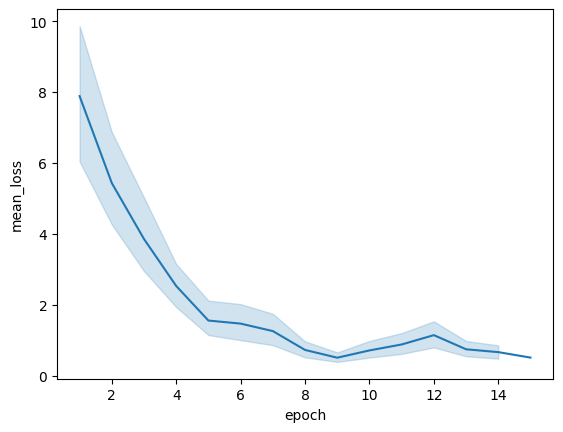

In [82]:
import pandas as pd
import seaborn as sns

model = operation.result()

snapshots = pd.DataFrame(model.tuning_task.snapshots)

sns.lineplot(data=snapshots, x = 'epoch', y='mean_loss')


## Evaluate your model

You can use the `genai.generate_content` method and specify the name of your model to test your model performance.

In [40]:
model = genai.GenerativeModel(model_name=f'tunedModels/{name}')

In [41]:
result = model.generate_content('Error: Trailing whitespace\nProblematic Code: nx.draw(graph, pos, with_labels=True, node_size=500, width=0.8, font_size=8, ')
result.text

'Corrected Code: nx.draw(graph, pos, with_labels=True, node_size=500, width=0.8, font_size=8, font_weight="bold")'

In [ ]:
result = model.generate_content('123455')
result.text

'123456'

In [ ]:
result = model.generate_content('four')
result.text

'five'

In [ ]:
result = model.generate_content('quatre') # French 4
result.text                               # French 5 is "cinq"

'cinq'

In [ ]:
result = model.generate_content('III')    # Roman numeral 3
result.text                               # Roman numeral 4 is IV

'IV'

In [ ]:
result = model.generate_content('七')  # Japanese 7
result.text                            # Japanese 8 is 八!

'八'

It really seems to have picked up the task despite the limited examples, but "next" is a simple concept, see the [tuning guide](https://ai.google.dev/gemini-api/docs/model-tuning) for more guidance on improving performance.

## Update the description

You can update the description of your tuned model any time using the `genai.update_tuned_model` method.

In [ ]:
genai.update_tuned_model(f'tunedModels/{name}', {"description":"This is my model."});

In [ ]:
model = genai.get_tuned_model(f'tunedModels/{name}')

model.description

'This is my model.'

## Delete the model

You can clean up your tuned model list by deleting models you no longer need. Use the `genai.delete_tuned_model` method to delete a model. If you canceled any tuning jobs, you may want to delete those as their performance may be unpredictable.

In [76]:
# genai.delete_tuned_model(f'tunedModels/{name}')

The model no longer exists:

In [48]:
try:
  m = genai.get_tuned_model(f'tunedModels/{name}')
  print(m)
except Exception as e:
  print(f"{type(e)}: {e}")

<class 'google.api_core.exceptions.NotFound'>: 404 Tuned model tunedModels/pylint-corrector-model-2 does not exist.
